# Introduction to Data Science
## Assignment - 1, Problem 6

### Group - 27

>1. 2022C104065 - PRONOY KUMAR JOADDAR<br>
>2. 2022C104040 - SANTOSH KUMAR TIWARY<br>
>3. 2022C104007 - ADYASHA TARASIA<br>

# Insurance Fraud claim Analytics

### Introduction:
Fraudulent claims are rare compared to the normal. As such, learn to properly classify imbalanced datasets. By applying supervised learning algorithms to detect fraudulent behavior based upon past fraud, and use unsupervised learning methods to discover new types of fraud activities.


### Business Understanding:

>Identifying and predict potential fraud claim .


### Approach Towards Problem Solving:
> 1. Load the Data and Perform EDA<br>
> 2. Data Wrangling to be done for Missing Data<br>
> 3. Check for highly Coorelated Columns and Select Features to be used in ML<br>
> 4. Perform 2 ML Techniques on Each<br>
>>1. KNN<br>
>>2. DBSCAN<br>
> 5. Compare Accuracy of Each Model and state Conclusion<br>

# Importing Library

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.express as px
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import matthews_corrcoef,classification_report,roc_curve
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option ('display.max.column', None)

# Data Acquisition

1. import Data
2. Find the object types
3. Check for Null and Missing Values
4. Shape of Dataset
5. Numerical or categorical data

In [2]:
_df_insurance_fraud_claim=pd.read_csv('Insurance_fraudulent_claim.csv')
_df_insurance_fraud_claim

parameter1 parameter2 parameter3 parameter4 parameter5 parameter6  \
0         14.1592    -1.9045     0.9459    15.4514    14.0054     3.2277   
1         13.9036     3.9835    -2.0057    17.5372    14.4898      2.724   
2         13.7907     -0.638     0.8326    15.7646    13.8737      3.048   
3         14.3365    -0.2095     2.8052    14.9243    13.4873     3.3192   
4         13.6008    -1.5439    -4.7146        NAN    13.4937     2.8564   
...           ...        ...        ...        ...        ...        ...   
99996      13.986    -5.0105    -0.4956    15.1516    13.9939     3.2326   
99997     14.4131    -8.8715    -2.4484     21.594    13.3282     2.2532   
99998     13.8775    -1.6429    -5.0518    21.5571    13.5637     2.1497   
99999      14.211   -11.8164    -8.6098    17.0152    13.8866     3.7091   
100000    14.2486    -6.5066    -5.7105    15.2058    13.7167     2.8295   

       parameter7 parameter8 parameter9 parameter10  parameter11 parameter12  \
0         16.1323     4.5563          Y    -12.0664       5.8746      3.3881   
1          7.0987     7.8754          N    -10.2442       4.7920      4.5317   
2         11.2321     7.4749          Y    -19.2275       6.1119     -2.0717   
3          9.1928     8.5139          Y       -7.83       4.6258     -5.1789   
4         12.0897     7.3956          N      -0.974       4.7376     -2.2111   
...           ...        ...        ...         ...          ...         ...   
99996      11.488     3.5142          N     11.6081       5.6709     -0.6209   
99997      4.9149     6.6345          Y    -10.5628       5.8802     -3.6797   
99998     11.2232     5.6456          Y     -5.4086       4.5555      0.1202   
99999      9.7148      5.793          Y      0.5339       6.0479     -2.1926   
100000    10.8762     8.0328          Y      0.3488       5.2839     -0.4541   

       parameter13 parameter14 parameter15 parameter16 parameter17  \
0            5.462      4.5206    -11.2254     24.7663     12.5705   
1           8.5577      6.8945     -12.249     13.2175      10.986   
2           7.7327      1.8425     -9.4913     29.7844     14.9691   
3           9.2823      1.3933     -0.0023     13.3375      4.7887   
4           7.7965         NAN     -0.1273     18.4513     22.5309   
...            ...         ...         ...         ...         ...   
99996       5.6669      3.7574     -9.5348     12.0465      8.6349   
99997       6.0019      6.5576    -11.8776     17.9467     17.0237   
99998       6.1629      4.4004     -0.4651     23.1127     12.1517   
99999       8.7542      1.4245      0.7086     14.0831     -2.0345   
100000      9.3688     -7.3826     -8.7049     11.3592     11.4779   

       parameter18 parameter19 parameter20 parameter21 parameter22  \
0               pc     25.3668      4.6959     -1.0271      0.3943   
1               pc     19.1724      0.6942     -7.2839     -0.2268   
2               ni     16.4965      3.2277      5.5686     -1.8694   
3               ni      30.405      3.5825     -3.5177     -1.2958   
4               pc      27.074       5.092     -1.3894     -0.4047   
...            ...         ...         ...         ...         ...   
99996           pc     25.1376      1.0914      2.9085      0.1005   
99997           ni     18.2345      0.8982      5.2281     -3.7424   
99998           ni      3.1453      3.1008      4.9473     -0.9905   
99999           ni      3.0911      5.5803     -3.3859      -0.444   
100000          ni      3.8474      2.4381     -7.7771     -2.7798   

        parameter23 parameter24 parameter25  parameter26 parameter27  \
0            4.5585      1.1147      8.7776      -1.6853     17.6058   
1           11.3834      -0.533     13.1119       3.1713     16.1356   
2            3.9265      2.7707     14.4417       2.4450     17.4312   
3            4.0519     -9.1059       9.048      -0.0999     11.9768   
4            5.2190     -1.2065      9.0614      -4.6725     19.3346   
...             ...

In [3]:
_df_insurance_fraud_claim.shape

(100001, 44)

In [4]:
_df_insurance_fraud_class = pd.read_excel('insurance_fraud_class.xlsx')
_df_insurance_fraud_class

target
0       Normal
1       Normal
2       Normal
3       Normal
4        Fraud
...        ...
99996   Normal
99997   Normal
99998   Normal
99999   Normal
100000  Normal

[100001 rows x 1 columns]

In [5]:
_df_insurance_fraud_class.shape

(100001, 1)

In [6]:
_df_insurance_fraud_class['target'].value_counts()

Normal    89918
Fraud     10083
Name: target, dtype: int64

In [7]:
print('Normal', round(_df_insurance_fraud_class['target'].value_counts()[0]/len(_df_insurance_fraud_class) * 100,2), '% of the dataset')
print('Fraud', round(_df_insurance_fraud_class['target'].value_counts()[1]/len(_df_insurance_fraud_class) * 100,2), '% of the dataset')

Normal 89.92 % of the dataset
Fraud 10.08 % of the dataset


Normal    89918
Fraud     10083
Name: target, dtype: int64

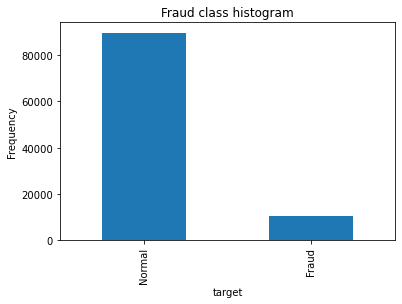

In [8]:
pd.value_counts(_df_insurance_fraud_class['target']).plot.bar()
plt.title('Fraud class histogram')
plt.xlabel('target')
plt.ylabel('Frequency')
_df_insurance_fraud_class['target'].value_counts()

Text(0.5, 1.0, 'parameter9 histogram')

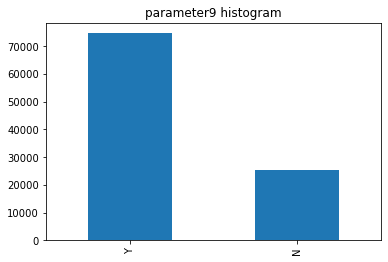

In [9]:
pd.value_counts(_df_insurance_fraud_claim['parameter9']).plot.bar()
plt.title('parameter9 histogram')

Text(0.5, 1.0, 'parameter18 histogram')

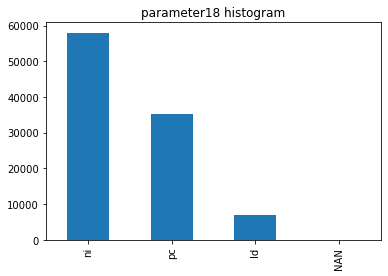

In [10]:
pd.value_counts(_df_insurance_fraud_claim['parameter18']).plot.bar()
plt.title('parameter18 histogram')

In [11]:
_df_insurance_fraud_claim['parameter18'].value_counts()

ni     57969
pc     35190
ld      6840
NAN        2
Name: parameter18, dtype: int64

# Data Preprocessing

In [12]:
#replacing NAN with NaN
data=_df_insurance_fraud_claim.replace({'NAN': np.nan})
data

parameter1 parameter2 parameter3 parameter4 parameter5 parameter6  \
0         14.1592    -1.9045     0.9459    15.4514    14.0054     3.2277   
1         13.9036     3.9835    -2.0057    17.5372    14.4898      2.724   
2         13.7907     -0.638     0.8326    15.7646    13.8737      3.048   
3         14.3365    -0.2095     2.8052    14.9243    13.4873     3.3192   
4         13.6008    -1.5439    -4.7146        NaN    13.4937     2.8564   
...           ...        ...        ...        ...        ...        ...   
99996      13.986    -5.0105    -0.4956    15.1516    13.9939     3.2326   
99997     14.4131    -8.8715    -2.4484     21.594    13.3282     2.2532   
99998     13.8775    -1.6429    -5.0518    21.5571    13.5637     2.1497   
99999      14.211   -11.8164    -8.6098    17.0152    13.8866     3.7091   
100000    14.2486    -6.5066    -5.7105    15.2058    13.7167     2.8295   

       parameter7 parameter8 parameter9 parameter10  parameter11 parameter12  \
0         16.1323     4.5563          Y    -12.0664       5.8746      3.3881   
1          7.0987     7.8754          N    -10.2442       4.7920      4.5317   
2         11.2321     7.4749          Y    -19.2275       6.1119     -2.0717   
3          9.1928     8.5139          Y       -7.83       4.6258     -5.1789   
4         12.0897     7.3956          N      -0.974       4.7376     -2.2111   
...           ...        ...        ...         ...          ...         ...   
99996      11.488     3.5142          N     11.6081       5.6709     -0.6209   
99997      4.9149     6.6345          Y    -10.5628       5.8802     -3.6797   
99998     11.2232     5.6456          Y     -5.4086       4.5555      0.1202   
99999      9.7148      5.793          Y      0.5339       6.0479     -2.1926   
100000    10.8762     8.0328          Y      0.3488       5.2839     -0.4541   

       parameter13 parameter14 parameter15 parameter16 parameter17  \
0            5.462      4.5206    -11.2254     24.7663     12.5705   
1           8.5577      6.8945     -12.249     13.2175      10.986   
2           7.7327      1.8425     -9.4913     29.7844     14.9691   
3           9.2823      1.3933     -0.0023     13.3375      4.7887   
4           7.7965         NaN     -0.1273     18.4513     22.5309   
...            ...         ...         ...         ...         ...   
99996       5.6669      3.7574     -9.5348     12.0465      8.6349   
99997       6.0019      6.5576    -11.8776     17.9467     17.0237   
99998       6.1629      4.4004     -0.4651     23.1127     12.1517   
99999       8.7542      1.4245      0.7086     14.0831     -2.0345   
100000      9.3688     -7.3826     -8.7049     11.3592     11.4779   

       parameter18 parameter19 parameter20 parameter21 parameter22  \
0               pc     25.3668      4.6959     -1.0271      0.3943   
1               pc     19.1724      0.6942     -7.2839     -0.2268   
2               ni     16.4965      3.2277      5.5686     -1.8694   
3               ni      30.405      3.5825     -3.5177     -1.2958   
4               pc      27.074       5.092     -1.3894     -0.4047   
...            ...         ...         ...         ...         ...   
99996           pc     25.1376      1.0914      2.9085      0.1005   
99997           ni     18.2345      0.8982      5.2281     -3.7424   
99998           ni      3.1453      3.1008      4.9473     -0.9905   
99999           ni      3.0911      5.5803     -3.3859      -0.444   
100000          ni      3.8474      2.4381     -7.7771     -2.7798   

        parameter23 parameter24 parameter25  parameter26 parameter27  \
0            4.5585      1.1147      8.7776      -1.6853     17.6058   
1           11.3834      -0.533     13.1119       3.1713     16.1356   
2            3.9265      2.7707     14.4417       2.4450     17.4312   
3            4.0519     -9.1059       9.048      -0.0999     11.9768   
4            5.2190     -1.2065      9.0614      -4.6725     19.3346   
...             ...

In [13]:
data.isnull().sum()

parameter1         8
parameter2        10
parameter3        10
parameter4     11729
parameter5        14
parameter6         6
parameter7        18
parameter8        12
parameter9         0
parameter10        6
parameter11        0
parameter12        6
parameter13       11
parameter14        6
parameter15       17
parameter16       11
parameter17       18
parameter18        2
parameter19        6
parameter20        4
parameter21       12
parameter22       10
parameter23        0
parameter24        3
parameter25        3
parameter26        0
parameter27        5
parameter28        0
parameter29        0
parameter30        0
parameter31        4
parameter32        2
parameter33        1
parameter34        1
parameter35        4
parameter36        0
parameter37        0
parameter38        0
parameter39        0
parameter40        1
parameter41        1
parameter42        1
parameter43        0
parameter44        2
dtype: int64

<AxesSubplot:>

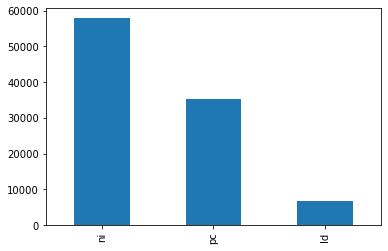

In [14]:
pd.value_counts(data['parameter18']).plot.bar()

In [15]:
data['parameter18'].value_counts()

ni    57969
pc    35190
ld     6840
Name: parameter18, dtype: int64

In [16]:
#we can see there are 2 null values here
data['parameter18'].isnull().sum()

2

## Using Encoding Techniqe 

In [17]:
#encoding catagorical variable and removing first column from encoded columns for both parameter
_df_data = pd.get_dummies(data, columns = ['parameter9','parameter18'], drop_first=True)
_df_data

parameter1 parameter2 parameter3 parameter4 parameter5 parameter6  \
0         14.1592    -1.9045     0.9459    15.4514    14.0054     3.2277   
1         13.9036     3.9835    -2.0057    17.5372    14.4898      2.724   
2         13.7907     -0.638     0.8326    15.7646    13.8737      3.048   
3         14.3365    -0.2095     2.8052    14.9243    13.4873     3.3192   
4         13.6008    -1.5439    -4.7146        NaN    13.4937     2.8564   
...           ...        ...        ...        ...        ...        ...   
99996      13.986    -5.0105    -0.4956    15.1516    13.9939     3.2326   
99997     14.4131    -8.8715    -2.4484     21.594    13.3282     2.2532   
99998     13.8775    -1.6429    -5.0518    21.5571    13.5637     2.1497   
99999      14.211   -11.8164    -8.6098    17.0152    13.8866     3.7091   
100000    14.2486    -6.5066    -5.7105    15.2058    13.7167     2.8295   

       parameter7 parameter8 parameter10  parameter11 parameter12 parameter13  \
0         16.1323     4.5563    -12.0664       5.8746      3.3881       5.462   
1          7.0987     7.8754    -10.2442       4.7920      4.5317      8.5577   
2         11.2321     7.4749    -19.2275       6.1119     -2.0717      7.7327   
3          9.1928     8.5139       -7.83       4.6258     -5.1789      9.2823   
4         12.0897     7.3956      -0.974       4.7376     -2.2111      7.7965   
...           ...        ...         ...          ...         ...         ...   
99996      11.488     3.5142     11.6081       5.6709     -0.6209      5.6669   
99997      4.9149     6.6345    -10.5628       5.8802     -3.6797      6.0019   
99998     11.2232     5.6456     -5.4086       4.5555      0.1202      6.1629   
99999      9.7148      5.793      0.5339       6.0479     -2.1926      8.7542   
100000    10.8762     8.0328      0.3488       5.2839     -0.4541      9.3688   

       parameter14 parameter15 parameter16 parameter17 parameter19  \
0           4.5206    -11.2254     24.7663     12.5705     25.3668   
1           6.8945     -12.249     13.2175      10.986     19.1724   
2           1.8425     -9.4913     29.7844     14.9691     16.4965   
3           1.3933     -0.0023     13.3375      4.7887      30.405   
4              NaN     -0.1273     18.4513     22.5309      27.074   
...            ...         ...         ...         ...         ...   
99996       3.7574     -9.5348     12.0465      8.6349     25.1376   
99997       6.5576    -11.8776     17.9467     17.0237     18.2345   
99998       4.4004     -0.4651     23.1127     12.1517      3.1453   
99999       1.4245      0.7086     14.0831     -2.0345      3.0911   
100000     -7.3826     -8.7049     11.3592     11.4779      3.8474   

       parameter20 parameter21 parameter22  parameter23 parameter24  \
0           4.6959     -1.0271      0.3943       4.5585      1.1147   
1           0.6942     -7.2839     -0.2268      11.3834      -0.533   
2           3.2277      5.5686     -1.8694       3.9265      2.7707   
3           3.5825     -3.5177     -1.2958       4.0519     -9.1059   
4            5.092     -1.3894     -0.4047       5.2190     -1.2065   
...            ...         ...         ...          ...         ...   
99996       1.0914      2.9085      0.1005       7.5665     -9.2149   
99997       0.8982      5.2281     -3.7424       5.7148     -13.747   
99998       3.1008      4.9473     -0.9905       9.4902    -12.8549   
99999       5.5803     -3.3859      -0.444       4.0902     -7.7085   
100000      2.4381     -7.7771     -2.7798       6.0089      2.1547   

       parameter25  parameter26 parameter27  parameter28  parameter29  \
0           8.7776      -1.6853     17.6058      10.7722     -10.3756   
1          13.1119       3.1713     16.1356      11.7533       3.5532   
2          14.4417       2.4450     17.4312      12.0320      -2.3546   
3            9.048      -0.0999     11.9768      12.1121      -2.1382   
4           9.0614      -4.6725     19.3346      11.0461      

In [18]:
#we can see after encoding NaN values automatically vanished
print(_df_data['parameter18_ni'].isnull().sum())
print(_df_data['parameter18_pc'].isnull().sum())

0
0


In [19]:
#concatinating class dataset
_df_merged_data=pd.concat([_df_data,_df_insurance_fraud_class],axis=1)
_df_merged_data

parameter1 parameter2 parameter3 parameter4 parameter5 parameter6  \
0         14.1592    -1.9045     0.9459    15.4514    14.0054     3.2277   
1         13.9036     3.9835    -2.0057    17.5372    14.4898      2.724   
2         13.7907     -0.638     0.8326    15.7646    13.8737      3.048   
3         14.3365    -0.2095     2.8052    14.9243    13.4873     3.3192   
4         13.6008    -1.5439    -4.7146        NaN    13.4937     2.8564   
...           ...        ...        ...        ...        ...        ...   
99996      13.986    -5.0105    -0.4956    15.1516    13.9939     3.2326   
99997     14.4131    -8.8715    -2.4484     21.594    13.3282     2.2532   
99998     13.8775    -1.6429    -5.0518    21.5571    13.5637     2.1497   
99999      14.211   -11.8164    -8.6098    17.0152    13.8866     3.7091   
100000    14.2486    -6.5066    -5.7105    15.2058    13.7167     2.8295   

       parameter7 parameter8 parameter10  parameter11 parameter12 parameter13  \
0         16.1323     4.5563    -12.0664       5.8746      3.3881       5.462   
1          7.0987     7.8754    -10.2442       4.7920      4.5317      8.5577   
2         11.2321     7.4749    -19.2275       6.1119     -2.0717      7.7327   
3          9.1928     8.5139       -7.83       4.6258     -5.1789      9.2823   
4         12.0897     7.3956      -0.974       4.7376     -2.2111      7.7965   
...           ...        ...         ...          ...         ...         ...   
99996      11.488     3.5142     11.6081       5.6709     -0.6209      5.6669   
99997      4.9149     6.6345    -10.5628       5.8802     -3.6797      6.0019   
99998     11.2232     5.6456     -5.4086       4.5555      0.1202      6.1629   
99999      9.7148      5.793      0.5339       6.0479     -2.1926      8.7542   
100000    10.8762     8.0328      0.3488       5.2839     -0.4541      9.3688   

       parameter14 parameter15 parameter16 parameter17 parameter19  \
0           4.5206    -11.2254     24.7663     12.5705     25.3668   
1           6.8945     -12.249     13.2175      10.986     19.1724   
2           1.8425     -9.4913     29.7844     14.9691     16.4965   
3           1.3933     -0.0023     13.3375      4.7887      30.405   
4              NaN     -0.1273     18.4513     22.5309      27.074   
...            ...         ...         ...         ...         ...   
99996       3.7574     -9.5348     12.0465      8.6349     25.1376   
99997       6.5576    -11.8776     17.9467     17.0237     18.2345   
99998       4.4004     -0.4651     23.1127     12.1517      3.1453   
99999       1.4245      0.7086     14.0831     -2.0345      3.0911   
100000     -7.3826     -8.7049     11.3592     11.4779      3.8474   

       parameter20 parameter21 parameter22  parameter23 parameter24  \
0           4.6959     -1.0271      0.3943       4.5585      1.1147   
1           0.6942     -7.2839     -0.2268      11.3834      -0.533   
2           3.2277      5.5686     -1.8694       3.9265      2.7707   
3           3.5825     -3.5177     -1.2958       4.0519     -9.1059   
4            5.092     -1.3894     -0.4047       5.2190     -1.2065   
...            ...         ...         ...          ...         ...   
99996       1.0914      2.9085      0.1005       7.5665     -9.2149   
99997       0.8982      5.2281     -3.7424       5.7148     -13.747   
99998       3.1008      4.9473     -0.9905       9.4902    -12.8549   
99999       5.5803     -3.3859      -0.444       4.0902     -7.7085   
100000      2.4381     -7.7771     -2.7798       6.0089      2.1547   

       parameter25  parameter26 parameter27  parameter28  parameter29  \
0           8.7776      -1.6853     17.6058      10.7722     -10.3756   
1          13.1119       3.1713     16.1356      11.7533       3.5532   
2          14.4417       2.4450     17.4312      12.0320      -2.3546   
3            9.048      -0.0999     11.9768      12.1121      -2.1382   
4           9.0614      -4.6725     19.3346      11.0461      

In [20]:
#using map function for class values
class_label={'Normal':0,'Fraud':1}
_df_merged_data['Target']=_df_merged_data['target'].map(class_label)
df_merged_data=_df_merged_data.drop('target',axis=1)
df_merged_data

parameter1 parameter2 parameter3 parameter4 parameter5 parameter6  \
0         14.1592    -1.9045     0.9459    15.4514    14.0054     3.2277   
1         13.9036     3.9835    -2.0057    17.5372    14.4898      2.724   
2         13.7907     -0.638     0.8326    15.7646    13.8737      3.048   
3         14.3365    -0.2095     2.8052    14.9243    13.4873     3.3192   
4         13.6008    -1.5439    -4.7146        NaN    13.4937     2.8564   
...           ...        ...        ...        ...        ...        ...   
99996      13.986    -5.0105    -0.4956    15.1516    13.9939     3.2326   
99997     14.4131    -8.8715    -2.4484     21.594    13.3282     2.2532   
99998     13.8775    -1.6429    -5.0518    21.5571    13.5637     2.1497   
99999      14.211   -11.8164    -8.6098    17.0152    13.8866     3.7091   
100000    14.2486    -6.5066    -5.7105    15.2058    13.7167     2.8295   

       parameter7 parameter8 parameter10  parameter11 parameter12 parameter13  \
0         16.1323     4.5563    -12.0664       5.8746      3.3881       5.462   
1          7.0987     7.8754    -10.2442       4.7920      4.5317      8.5577   
2         11.2321     7.4749    -19.2275       6.1119     -2.0717      7.7327   
3          9.1928     8.5139       -7.83       4.6258     -5.1789      9.2823   
4         12.0897     7.3956      -0.974       4.7376     -2.2111      7.7965   
...           ...        ...         ...          ...         ...         ...   
99996      11.488     3.5142     11.6081       5.6709     -0.6209      5.6669   
99997      4.9149     6.6345    -10.5628       5.8802     -3.6797      6.0019   
99998     11.2232     5.6456     -5.4086       4.5555      0.1202      6.1629   
99999      9.7148      5.793      0.5339       6.0479     -2.1926      8.7542   
100000    10.8762     8.0328      0.3488       5.2839     -0.4541      9.3688   

       parameter14 parameter15 parameter16 parameter17 parameter19  \
0           4.5206    -11.2254     24.7663     12.5705     25.3668   
1           6.8945     -12.249     13.2175      10.986     19.1724   
2           1.8425     -9.4913     29.7844     14.9691     16.4965   
3           1.3933     -0.0023     13.3375      4.7887      30.405   
4              NaN     -0.1273     18.4513     22.5309      27.074   
...            ...         ...         ...         ...         ...   
99996       3.7574     -9.5348     12.0465      8.6349     25.1376   
99997       6.5576    -11.8776     17.9467     17.0237     18.2345   
99998       4.4004     -0.4651     23.1127     12.1517      3.1453   
99999       1.4245      0.7086     14.0831     -2.0345      3.0911   
100000     -7.3826     -8.7049     11.3592     11.4779      3.8474   

       parameter20 parameter21 parameter22  parameter23 parameter24  \
0           4.6959     -1.0271      0.3943       4.5585      1.1147   
1           0.6942     -7.2839     -0.2268      11.3834      -0.533   
2           3.2277      5.5686     -1.8694       3.9265      2.7707   
3           3.5825     -3.5177     -1.2958       4.0519     -9.1059   
4            5.092     -1.3894     -0.4047       5.2190     -1.2065   
...            ...         ...         ...          ...         ...   
99996       1.0914      2.9085      0.1005       7.5665     -9.2149   
99997       0.8982      5.2281     -3.7424       5.7148     -13.747   
99998       3.1008      4.9473     -0.9905       9.4902    -12.8549   
99999       5.5803     -3.3859      -0.444       4.0902     -7.7085   
100000      2.4381     -7.7771     -2.7798       6.0089      2.1547   

       parameter25  parameter26 parameter27  parameter28  parameter29  \
0           8.7776      -1.6853     17.6058      10.7722     -10.3756   
1          13.1119       3.1713     16.1356      11.7533       3.5532   
2          14.4417       2.4450     17.4312      12.0320      -2.3546   
3            9.048      -0.0999     11.9768      12.1121      -2.1382   
4           9.0614      -4.6725     19.3346      11.0461      

In [21]:
df_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 46 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   parameter1      99993 non-null   object 
 1   parameter2      99991 non-null   object 
 2   parameter3      99991 non-null   object 
 3   parameter4      88272 non-null   object 
 4   parameter5      99987 non-null   object 
 5   parameter6      99995 non-null   object 
 6   parameter7      99983 non-null   object 
 7   parameter8      99989 non-null   object 
 8   parameter10     99995 non-null   object 
 9   parameter11     100001 non-null  float64
 10  parameter12     99995 non-null   object 
 11  parameter13     99990 non-null   object 
 12  parameter14     99995 non-null   object 
 13  parameter15     99984 non-null   object 
 14  parameter16     99990 non-null   object 
 15  parameter17     99983 non-null   object 
 16  parameter19     99995 non-null   object 
 17  parameter2

## Handling Missing Values

In [22]:
#replacing NaN with median
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(fill_value=np.nan, strategy='median')
_df_merged_data_final = imputer.fit_transform(df_merged_data)
_df_merged_data_final = pd.DataFrame(_df_merged_data_final, columns=df_merged_data.columns)

In [24]:
_df_merged_data_final['parameter9_Y']= _df_merged_data_final['parameter9_Y'].apply(np.int64)
_df_merged_data_final['parameter18_ni']= _df_merged_data_final['parameter18_ni'].apply(np.int64)
_df_merged_data_final['parameter18_pc']= _df_merged_data_final['parameter18_pc'].apply(np.int64)
_df_merged_data_final['Target']= _df_merged_data_final['Target'].apply(np.int64)

_df_merged_data_final

parameter1  parameter2  parameter3  parameter4  parameter5  \
0          14.1592     -1.9045      0.9459     15.4514     14.0054   
1          13.9036      3.9835     -2.0057     17.5372     14.4898   
2          13.7907     -0.6380      0.8326     15.7646     13.8737   
3          14.3365     -0.2095      2.8052     14.9243     13.4873   
4          13.6008     -1.5439     -4.7146     17.0603     13.4937   
...            ...         ...         ...         ...         ...   
99996      13.9860     -5.0105     -0.4956     15.1516     13.9939   
99997      14.4131     -8.8715     -2.4484     21.5940     13.3282   
99998      13.8775     -1.6429     -5.0518     21.5571     13.5637   
99999      14.2110    -11.8164     -8.6098     17.0152     13.8866   
100000     14.2486     -6.5066     -5.7105     15.2058     13.7167   

        parameter6  parameter7  parameter8  parameter10  parameter11  \
0           3.2277     16.1323      4.5563     -12.0664       5.8746   
1           2.7240      7.0987      7.8754     -10.2442       4.7920   
2           3.0480     11.2321      7.4749     -19.2275       6.1119   
3           3.3192      9.1928      8.5139      -7.8300       4.6258   
4           2.8564     12.0897      7.3956      -0.9740       4.7376   
...            ...         ...         ...          ...          ...   
99996       3.2326     11.4880      3.5142      11.6081       5.6709   
99997       2.2532      4.9149      6.6345     -10.5628       5.8802   
99998       2.1497     11.2232      5.6456      -5.4086       4.5555   
99999       3.7091      9.7148      5.7930       0.5339       6.0479   
100000      2.8295     10.8762      8.0328       0.3488       5.2839   

        parameter12  parameter13  parameter14  parameter15  parameter16  \
0            3.3881       5.4620       4.5206     -11.2254      24.7663   
1            4.5317       8.5577       6.8945     -12.2490      13.2175   
2           -2.0717       7.7327       1.8425      -9.4913      29.7844   
3           -5.1789       9.2823       1.3933      -0.0023      13.3375   
4           -2.2111       7.7965       0.4954      -0.1273      18.4513   
...             ...          ...          ...          ...          ...   
99996       -0.6209       5.6669       3.7574      -9.5348      12.0465   
99997       -3.6797       6.0019       6.5576     -11.8776      17.9467   
99998        0.1202       6.1629       4.4004      -0.4651      23.1127   
99999       -2.1926       8.7542       1.4245       0.7086      14.0831   
100000      -0.4541       9.3688      -7.3826      -8.7049      11.3592   

        parameter17  parameter19  parameter20  parameter21  parameter22  \
0           12.5705      25.3668       4.6959      -1.0271       0.3943   
1           10.9860      19.1724       0.6942      -7.2839      -0.2268   
2           14.9691      16.4965       3.2277       5.5686      -1.8694   
3            4.7887      30.4050       3.5825      -3.5177      -1.2958   
4           22.5309      27.0740       5.0920      -1.3894      -0.4047   
...             ...          ...          ...          ...          ...   
99996        8.6349      25.1376       1.0914       2.9085       0.1005   
99997       17.0237      18.2345       0.8982       5.2281      -3.7424   
99998       12.1517       3.1453       3.1008       4.9473      -0.9905   
99999       -2.0345       3.0911       5.5803      -3.3859      -0.4440   
100000      11.4779       3.8474       2.4381      -7.7771      -2.7798   

        parameter23  parameter24  parameter25  parameter26  parameter27  \
0            4.5585       1.1147       8.7776      -1.6853      17.6058   
1           11.3834      -0.5330      13.1119       3.1713      16.1356   
2            3.9265       2.7707      14.4417       2.4450      17.4312   
3            4.0519      -9.1059       9.0480      -0.0999      11.9768   
4            5.2190      -1.2065       9.0614      -4.6725      19.3346   
...             ...          ...          ...     

In [25]:
_df_merged_data_final.describe()

parameter1     parameter2     parameter3     parameter4  \
count  100001.000000  100001.000000  100001.000000  100001.000000   
mean       14.023864      -5.458608      -1.619092      17.120865   
std         0.191034      65.123146       4.050556       3.014658   
min         7.651800     -33.380200     -15.043400       6.465300   
25%        13.894500     -10.436700      -4.730600      15.124900   
50%        14.025100      -5.633700      -1.602800      17.060300   
75%        14.163500      -0.780200       1.373100      19.108500   
max        14.654500   20478.690000      10.376800      27.691800   

          parameter5     parameter6     parameter7     parameter8  \
count  100001.000000  100001.000000  100001.000000  100001.000000   
mean       13.621259       3.018970      10.695853       6.792045   
std        14.558343       0.526083       5.147339       2.040668   
min     -4589.220000       1.470600       0.408400       0.016200   
25%        13.455500       2.633600       8.456300       5.249700   
50%        13.663100       3.009900      10.523400       6.820100   
75%        13.863100       3.403000      12.761300       8.314400   
max        14.654600       4.789400    1324.665000      12.991800   

         parameter10    parameter11    parameter12    parameter13  \
count  100001.000000  100001.000000  100001.000000  100001.000000   
mean       -5.041708       5.410733       0.282941       7.566827   
std         7.864710       0.868705       3.333190       1.231385   
min       -30.681600       2.347300     -10.265300       4.162400   
25%       -11.178500       4.765600      -2.314900       6.623600   
50%        -4.819000       5.384800       0.410500       7.625200   
75%         0.958800       6.007000       2.935400       8.581100   
max        16.900200       8.433000      10.137700      11.136500   

         parameter14    parameter15    parameter16    parameter17  \
count  100001.000000  100001.000000  100001.000000  100001.000000   
mean        0.607034      -3.022718      15.233808      12.441166   
std        64.991678      65.150510       7.845573       8.739267   
min       -20.731300     -24.875700     -10.664200     -12.402500   
25%        -3.592600      -7.488300       9.184200       6.301200   
50%         0.495400      -3.273650      15.168700      12.440200   
75%         4.410900       0.840900      21.016800      18.399900   
max     20478.690000   20478.690000      41.748000    1147.360000   

         parameter19    parameter20    parameter21    parameter22  \
count  100001.000000  100001.000000  100001.000000  100001.000000   
mean       17.250595       4.301472      -3.850023      -1.131766   
std         8.197354       2.848111      65.042936       1.521874   
min        -9.710300      -5.322500     -24.243100      -5.709700   
25%        11.541700       2.173300      -8.320000      -2.302200   
50%        17.209300       4.281600      -4.201900      -1.124100   
75%        23.110000       6.300300      -0.089300       0.018200   
max        47.361200      14.594500   20478.690000       3.243100   

         parameter23    parameter24    parameter25    parameter26  \
count  100001.000000  100001.000000  100001.000000  100001.000000   
mean        5.049654      -7.671946      10.395936      -0.524211   
std         2.614305       9.014303       2.159295       2.584769   
min        -3.929200     -34.798400       2.930300      -8.084300   
25%         3.167000     -13.771400       8.871600      -2.511600   
50%         4.948700      -7.406450      10.368000      -0.500800   
75%         6.795200      -1.451000      11.892600       1.458500   
max        13.125700    1324.665000      20.047100       6.696400   

         parameter27    parameter28    parameter29    parameter30  \
count  100001.000000  100001.000000  100001.000000  100001.000000   
mean       14.778904      11.432680       3.845828       2.184148   
std         4.328383       0.542273       5.164112       3.119673   
mi

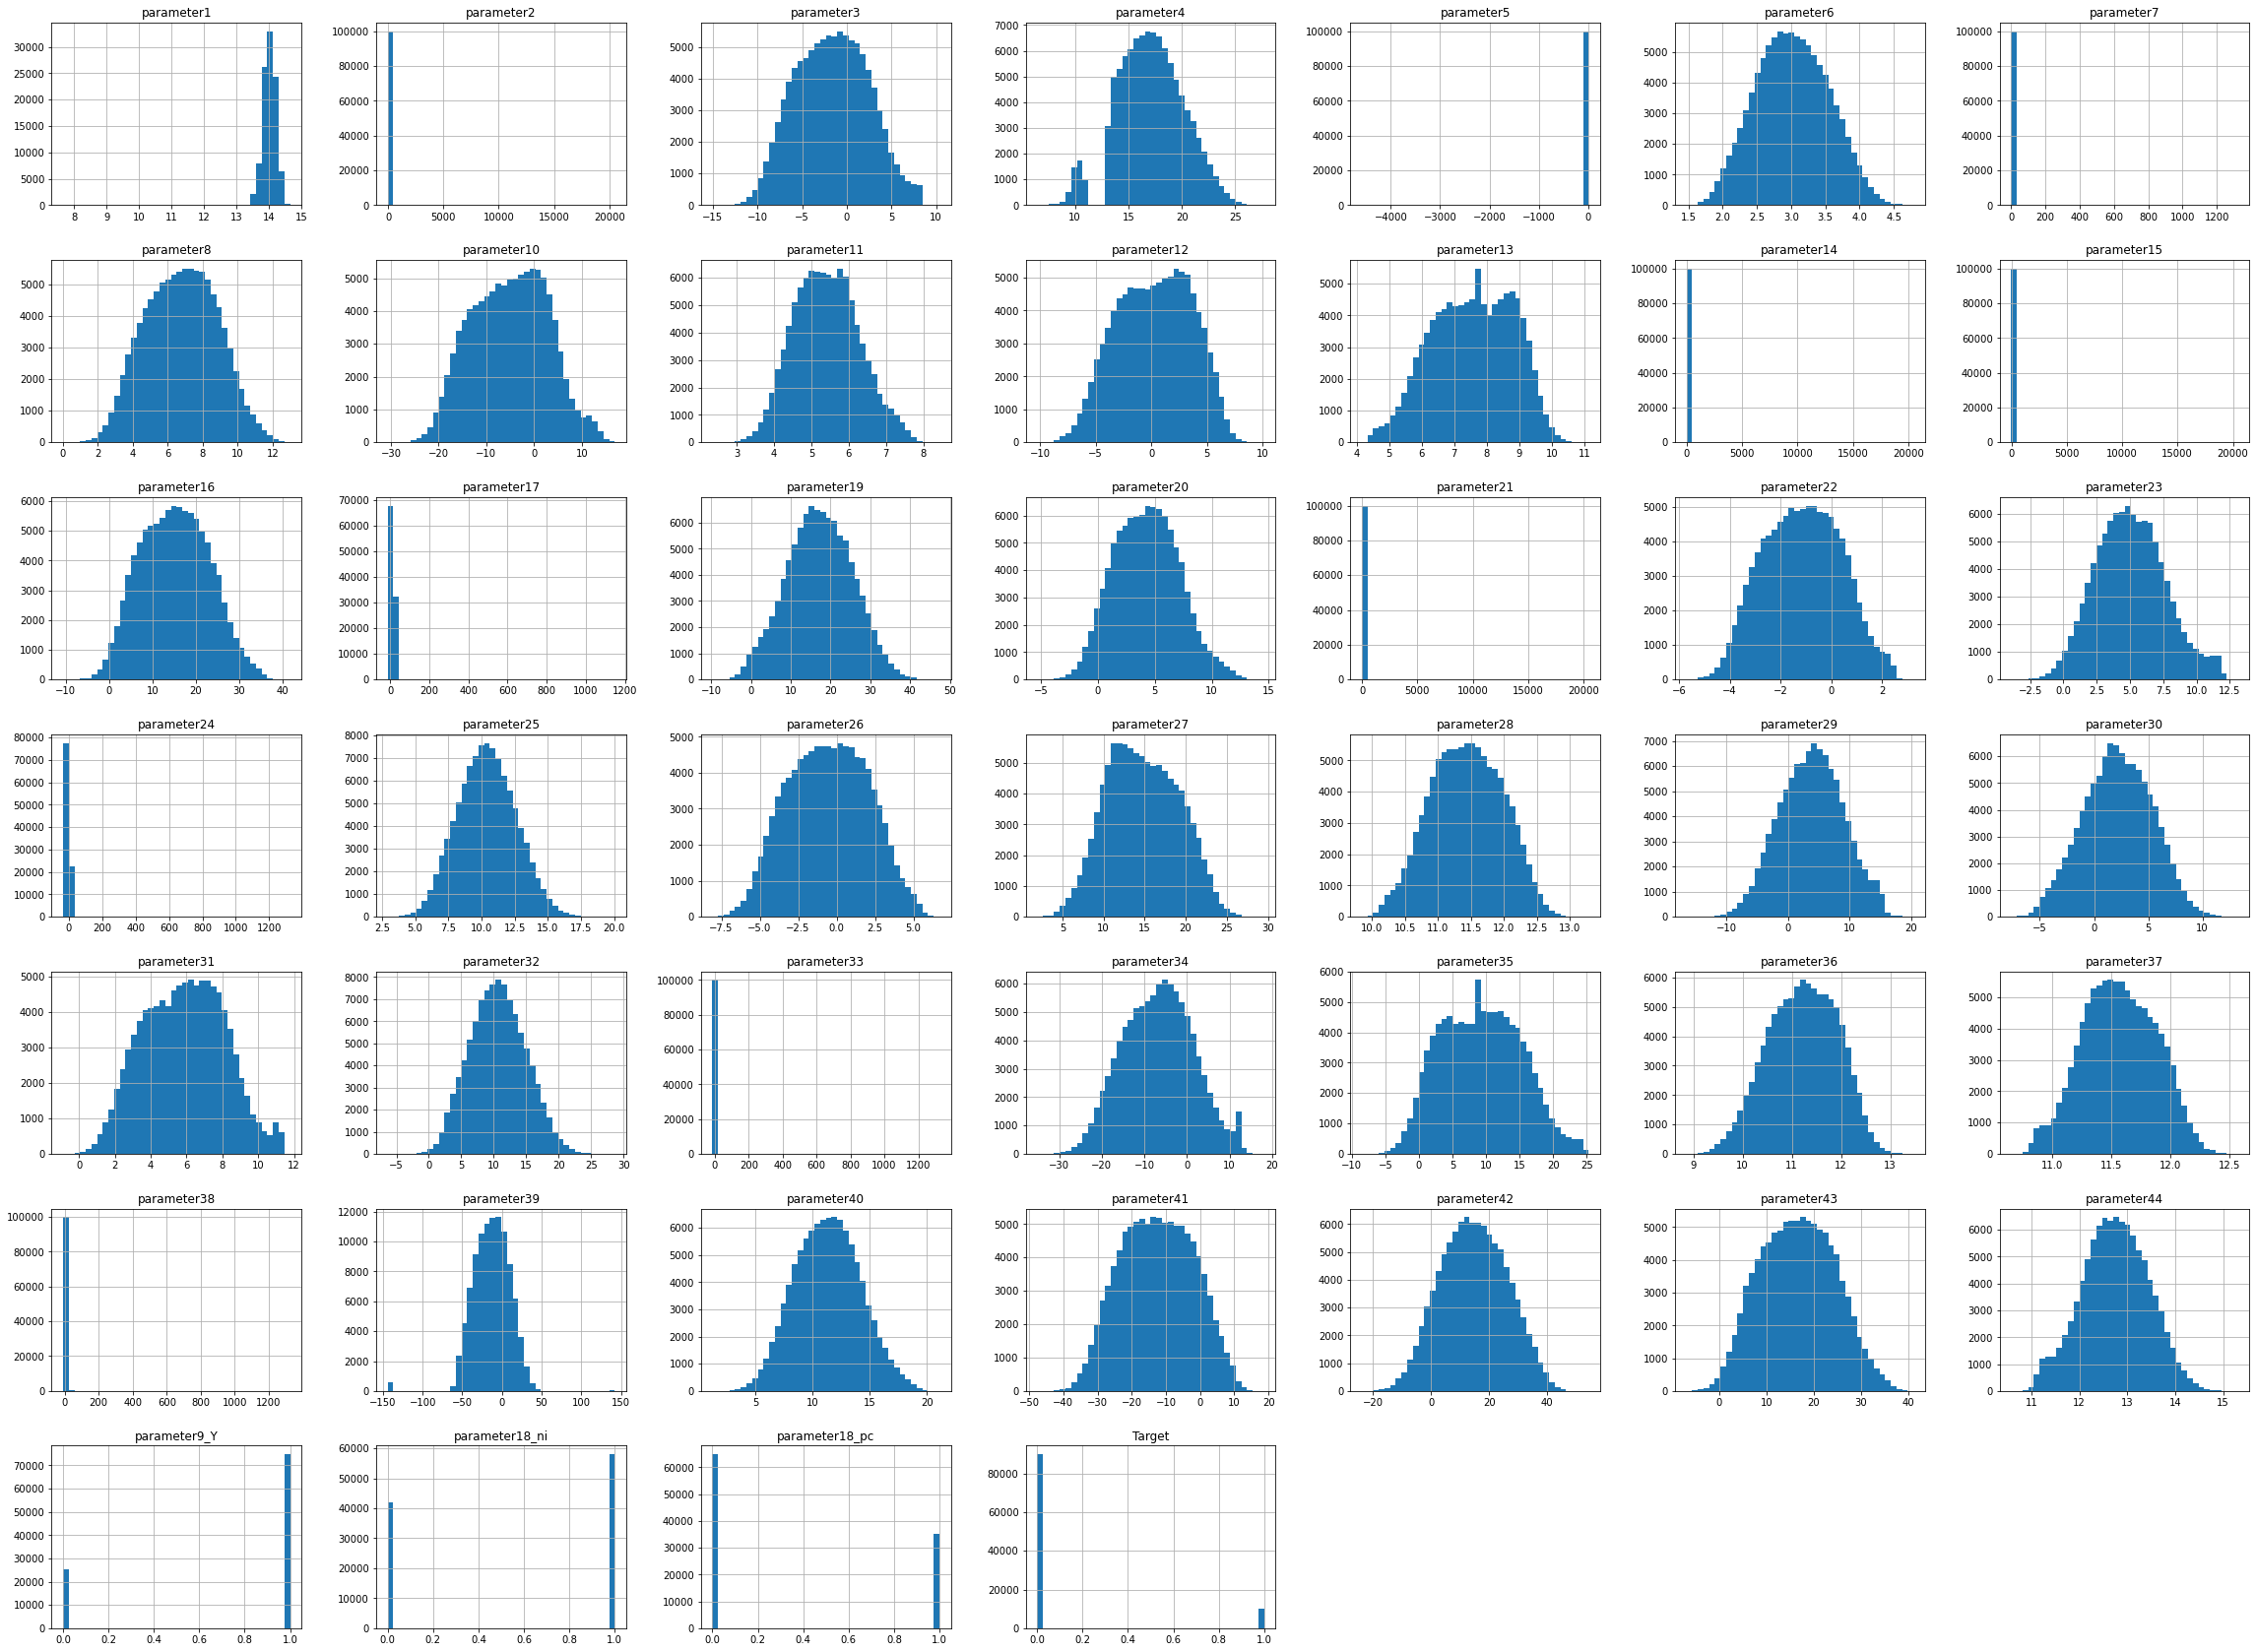

In [25]:
_df_merged_data_final.hist(bins = 40, figsize = (40,30)) 
plt.show()

## Handling skewness and outlires
>Here we are removing extreem outlires by setting required limit for necessary columns.
This techniqe is handing skewness very well.

In [ ]:
limit = 100
column_name = 'parameter21'
count = (_df_merged_data_final[column_name] > limit).sum()
print('Count of values greater than limit : ', count)

In [30]:
re_df=_df_merged_data_final.copy()
#re_df.drop(re_df[re_df.parameter1 < 12].index, inplace = True)
re_df.drop(re_df[re_df.parameter2 > 100].index, inplace = True)
re_df.drop(re_df[re_df.parameter5 < -1000].index, inplace = True)
re_df.drop(re_df[re_df.parameter7 > 100].index, inplace = True)
re_df.drop(re_df[re_df.parameter14 > 100].index, inplace = True)
re_df.drop(re_df[re_df.parameter15 > 100].index, inplace = True)
re_df.drop(re_df[re_df.parameter21 > 100].index, inplace = True)
re_df.drop(re_df[re_df.parameter24 > 100].index, inplace = True)
re_df.drop(re_df[re_df.parameter17 > 100].index, inplace = True)
re_df.drop(re_df[re_df.parameter33 > 100].index, inplace = True)
re_df.drop(re_df[re_df.parameter38 > 100].index, inplace = True)
#re_df.drop(re_df[re_df.parameter39 > 100].index, inplace = True)
#re_df.drop(re_df[re_df.parameter39 < -100].index, inplace = True)

re_df

parameter1  parameter2  parameter3  parameter4  parameter5  \
0          14.1592     -1.9045      0.9459     15.4514     14.0054   
1          13.9036      3.9835     -2.0057     17.5372     14.4898   
2          13.7907     -0.6380      0.8326     15.7646     13.8737   
3          14.3365     -0.2095      2.8052     14.9243     13.4873   
4          13.6008     -1.5439     -4.7146     17.0603     13.4937   
...            ...         ...         ...         ...         ...   
99996      13.9860     -5.0105     -0.4956     15.1516     13.9939   
99997      14.4131     -8.8715     -2.4484     21.5940     13.3282   
99998      13.8775     -1.6429     -5.0518     21.5571     13.5637   
99999      14.2110    -11.8164     -8.6098     17.0152     13.8866   
100000     14.2486     -6.5066     -5.7105     15.2058     13.7167   

        parameter6  parameter7  parameter8  parameter10  parameter11  \
0           3.2277     16.1323      4.5563     -12.0664       5.8746   
1           2.7240      7.0987      7.8754     -10.2442       4.7920   
2           3.0480     11.2321      7.4749     -19.2275       6.1119   
3           3.3192      9.1928      8.5139      -7.8300       4.6258   
4           2.8564     12.0897      7.3956      -0.9740       4.7376   
...            ...         ...         ...          ...          ...   
99996       3.2326     11.4880      3.5142      11.6081       5.6709   
99997       2.2532      4.9149      6.6345     -10.5628       5.8802   
99998       2.1497     11.2232      5.6456      -5.4086       4.5555   
99999       3.7091      9.7148      5.7930       0.5339       6.0479   
100000      2.8295     10.8762      8.0328       0.3488       5.2839   

        parameter12  parameter13  parameter14  parameter15  parameter16  \
0            3.3881       5.4620       4.5206     -11.2254      24.7663   
1            4.5317       8.5577       6.8945     -12.2490      13.2175   
2           -2.0717       7.7327       1.8425      -9.4913      29.7844   
3           -5.1789       9.2823       1.3933      -0.0023      13.3375   
4           -2.2111       7.7965       0.4954      -0.1273      18.4513   
...             ...          ...          ...          ...          ...   
99996       -0.6209       5.6669       3.7574      -9.5348      12.0465   
99997       -3.6797       6.0019       6.5576     -11.8776      17.9467   
99998        0.1202       6.1629       4.4004      -0.4651      23.1127   
99999       -2.1926       8.7542       1.4245       0.7086      14.0831   
100000      -0.4541       9.3688      -7.3826      -8.7049      11.3592   

        parameter17  parameter19  parameter20  parameter21  parameter22  \
0           12.5705      25.3668       4.6959      -1.0271       0.3943   
1           10.9860      19.1724       0.6942      -7.2839      -0.2268   
2           14.9691      16.4965       3.2277       5.5686      -1.8694   
3            4.7887      30.4050       3.5825      -3.5177      -1.2958   
4           22.5309      27.0740       5.0920      -1.3894      -0.4047   
...             ...          ...          ...          ...          ...   
99996        8.6349      25.1376       1.0914       2.9085       0.1005   
99997       17.0237      18.2345       0.8982       5.2281      -3.7424   
99998       12.1517       3.1453       3.1008       4.9473      -0.9905   
99999       -2.0345       3.0911       5.5803      -3.3859      -0.4440   
100000      11.4779       3.8474       2.4381      -7.7771      -2.7798   

        parameter23  parameter24  parameter25  parameter26  parameter27  \
0            4.5585       1.1147       8.7776      -1.6853      17.6058   
1           11.3834      -0.5330      13.1119       3.1713      16.1356   
2            3.9265       2.7707      14.4417       2.4450      17.4312   
3            4.0519      -9.1059       9.0480      -0.0999      11.9768   
4            5.2190      -1.2065       9.0614      -4.6725      19.3346   
...             ...          ...          ...     

In [31]:
re_df=re_df.reset_index(drop=True)
re_df

parameter1  parameter2  parameter3  parameter4  parameter5  parameter6  \
0         14.1592     -1.9045      0.9459     15.4514     14.0054      3.2277   
1         13.9036      3.9835     -2.0057     17.5372     14.4898      2.7240   
2         13.7907     -0.6380      0.8326     15.7646     13.8737      3.0480   
3         14.3365     -0.2095      2.8052     14.9243     13.4873      3.3192   
4         13.6008     -1.5439     -4.7146     17.0603     13.4937      2.8564   
...           ...         ...         ...         ...         ...         ...   
99984     13.9860     -5.0105     -0.4956     15.1516     13.9939      3.2326   
99985     14.4131     -8.8715     -2.4484     21.5940     13.3282      2.2532   
99986     13.8775     -1.6429     -5.0518     21.5571     13.5637      2.1497   
99987     14.2110    -11.8164     -8.6098     17.0152     13.8866      3.7091   
99988     14.2486     -6.5066     -5.7105     15.2058     13.7167      2.8295   

       parameter7  parameter8  parameter10  parameter11  parameter12  \
0         16.1323      4.5563     -12.0664       5.8746       3.3881   
1          7.0987      7.8754     -10.2442       4.7920       4.5317   
2         11.2321      7.4749     -19.2275       6.1119      -2.0717   
3          9.1928      8.5139      -7.8300       4.6258      -5.1789   
4         12.0897      7.3956      -0.9740       4.7376      -2.2111   
...           ...         ...          ...          ...          ...   
99984     11.4880      3.5142      11.6081       5.6709      -0.6209   
99985      4.9149      6.6345     -10.5628       5.8802      -3.6797   
99986     11.2232      5.6456      -5.4086       4.5555       0.1202   
99987      9.7148      5.7930       0.5339       6.0479      -2.1926   
99988     10.8762      8.0328       0.3488       5.2839      -0.4541   

       parameter13  parameter14  parameter15  parameter16  parameter17  \
0           5.4620       4.5206     -11.2254      24.7663      12.5705   
1           8.5577       6.8945     -12.2490      13.2175      10.9860   
2           7.7327       1.8425      -9.4913      29.7844      14.9691   
3           9.2823       1.3933      -0.0023      13.3375       4.7887   
4           7.7965       0.4954      -0.1273      18.4513      22.5309   
...            ...          ...          ...          ...          ...   
99984       5.6669       3.7574      -9.5348      12.0465       8.6349   
99985       6.0019       6.5576     -11.8776      17.9467      17.0237   
99986       6.1629       4.4004      -0.4651      23.1127      12.1517   
99987       8.7542       1.4245       0.7086      14.0831      -2.0345   
99988       9.3688      -7.3826      -8.7049      11.3592      11.4779   

       parameter19  parameter20  parameter21  parameter22  parameter23  \
0          25.3668       4.6959      -1.0271       0.3943       4.5585   
1          19.1724       0.6942      -7.2839      -0.2268      11.3834   
2          16.4965       3.2277       5.5686      -1.8694       3.9265   
3          30.4050       3.5825      -3.5177      -1.2958       4.0519   
4          27.0740       5.0920      -1.3894      -0.4047       5.2190   
...            ...          ...          ...          ...          ...   
99984      25.1376       1.0914       2.9085       0.1005       7.5665   
99985      18.2345       0.8982       5.2281      -3.7424       5.7148   
99986       3.1453       3.1008       4.9473      -0.9905       9.4902   
99987       3.0911       5.5803      -3.3859      -0.4440       4.0902   
99988       3.8474       2.4381      -7.7771      -2.7798       6.0089   

       parameter24  parameter25  parameter26  parameter27  parameter28  \
0           1.1147       8.7776      -1.6853      17.6058      10.7722   
1          -0.5330      13.1119       3.1713      16.1356      11.7533   
2           2.7707      14.4417       2.4450      17.4312      12.0320   
3          -9.1059       9.0480      -0.0999      11.9768      12.1121   
4          -1.2065   

In [32]:
re_df.shape

(99989, 46)

In [34]:
re_df.describe().style.background_gradient()

## Data Visualization

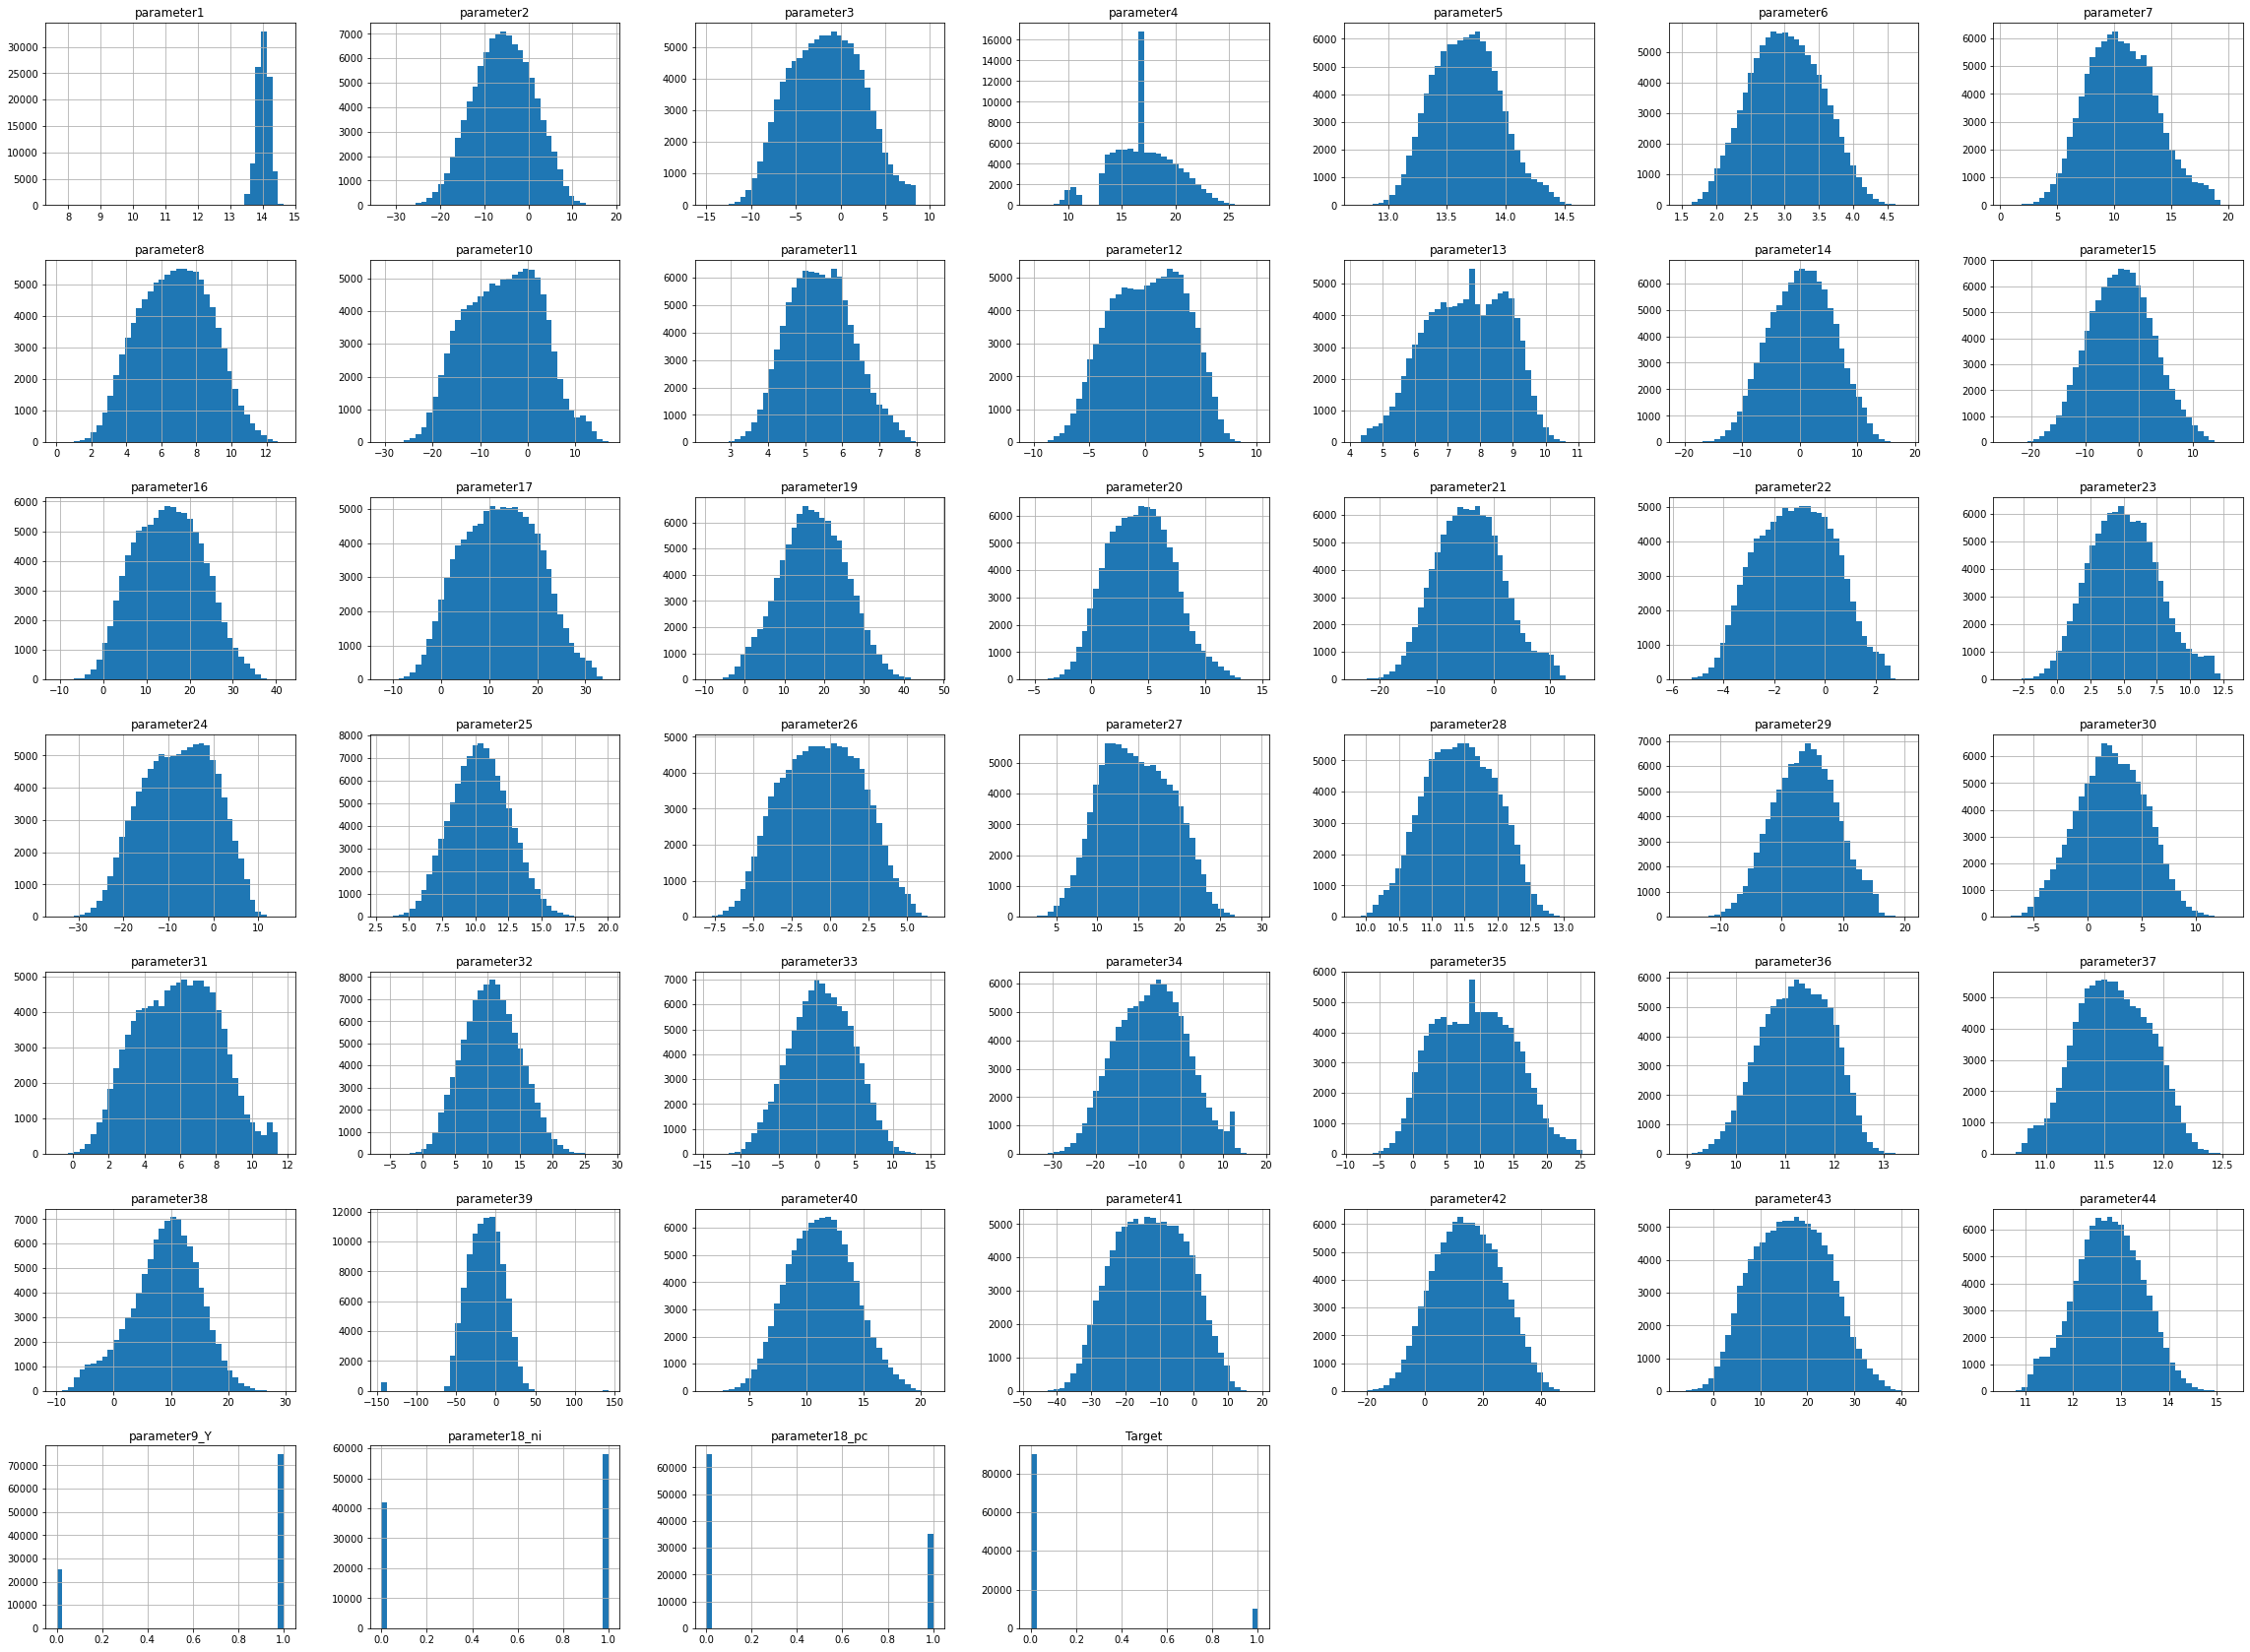

In [35]:
re_df.hist(bins = 40, figsize = (40,30)) 
plt.show()

<AxesSubplot:>

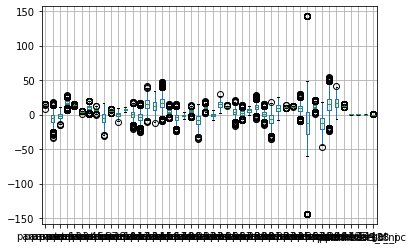

In [36]:
re_df.boxplot()

## Skewness of the Data

In [37]:
re_df.skew()

parameter1       -0.508732
parameter2       -0.052796
parameter3        0.054984
parameter4       -0.075532
parameter5        0.177824
parameter6        0.058929
parameter7        0.235729
parameter8        0.003541
parameter10      -0.001893
parameter11       0.154848
parameter12      -0.113253
parameter13      -0.170096
parameter14      -0.062176
parameter15       0.065689
parameter16       0.088117
parameter17       0.048090
parameter19      -0.003714
parameter20       0.153383
parameter21       0.172001
parameter22       0.020690
parameter23       0.198565
parameter24      -0.113111
parameter25       0.072291
parameter26      -0.002335
parameter27       0.087956
parameter28      -0.025594
parameter29      -0.025136
parameter30      -0.041043
parameter31       0.037758
parameter32       0.102960
parameter33      -0.044049
parameter34       0.042433
parameter35       0.135838
parameter36      -0.136510
parameter37      -0.014328
parameter38      -0.336864
parameter39      -0.800890
p

In [38]:
re_df.columns

Index(['parameter1', 'parameter2', 'parameter3', 'parameter4', 'parameter5',
       'parameter6', 'parameter7', 'parameter8', 'parameter10', 'parameter11',
       'parameter12', 'parameter13', 'parameter14', 'parameter15',
       'parameter16', 'parameter17', 'parameter19', 'parameter20',
       'parameter21', 'parameter22', 'parameter23', 'parameter24',
       'parameter25', 'parameter26', 'parameter27', 'parameter28',
       'parameter29', 'parameter30', 'parameter31', 'parameter32',
       'parameter33', 'parameter34', 'parameter35', 'parameter36',
       'parameter37', 'parameter38', 'parameter39', 'parameter40',
       'parameter41', 'parameter42', 'parameter43', 'parameter44',
       'parameter9_Y', 'parameter18_ni', 'parameter18_pc', 'Target'],
      dtype='object')

In [39]:
clean_data=re_df.copy()
clean_data

parameter1  parameter2  parameter3  parameter4  parameter5  parameter6  \
0         14.1592     -1.9045      0.9459     15.4514     14.0054      3.2277   
1         13.9036      3.9835     -2.0057     17.5372     14.4898      2.7240   
2         13.7907     -0.6380      0.8326     15.7646     13.8737      3.0480   
3         14.3365     -0.2095      2.8052     14.9243     13.4873      3.3192   
4         13.6008     -1.5439     -4.7146     17.0603     13.4937      2.8564   
...           ...         ...         ...         ...         ...         ...   
99984     13.9860     -5.0105     -0.4956     15.1516     13.9939      3.2326   
99985     14.4131     -8.8715     -2.4484     21.5940     13.3282      2.2532   
99986     13.8775     -1.6429     -5.0518     21.5571     13.5637      2.1497   
99987     14.2110    -11.8164     -8.6098     17.0152     13.8866      3.7091   
99988     14.2486     -6.5066     -5.7105     15.2058     13.7167      2.8295   

       parameter7  parameter8  parameter10  parameter11  parameter12  \
0         16.1323      4.5563     -12.0664       5.8746       3.3881   
1          7.0987      7.8754     -10.2442       4.7920       4.5317   
2         11.2321      7.4749     -19.2275       6.1119      -2.0717   
3          9.1928      8.5139      -7.8300       4.6258      -5.1789   
4         12.0897      7.3956      -0.9740       4.7376      -2.2111   
...           ...         ...          ...          ...          ...   
99984     11.4880      3.5142      11.6081       5.6709      -0.6209   
99985      4.9149      6.6345     -10.5628       5.8802      -3.6797   
99986     11.2232      5.6456      -5.4086       4.5555       0.1202   
99987      9.7148      5.7930       0.5339       6.0479      -2.1926   
99988     10.8762      8.0328       0.3488       5.2839      -0.4541   

       parameter13  parameter14  parameter15  parameter16  parameter17  \
0           5.4620       4.5206     -11.2254      24.7663      12.5705   
1           8.5577       6.8945     -12.2490      13.2175      10.9860   
2           7.7327       1.8425      -9.4913      29.7844      14.9691   
3           9.2823       1.3933      -0.0023      13.3375       4.7887   
4           7.7965       0.4954      -0.1273      18.4513      22.5309   
...            ...          ...          ...          ...          ...   
99984       5.6669       3.7574      -9.5348      12.0465       8.6349   
99985       6.0019       6.5576     -11.8776      17.9467      17.0237   
99986       6.1629       4.4004      -0.4651      23.1127      12.1517   
99987       8.7542       1.4245       0.7086      14.0831      -2.0345   
99988       9.3688      -7.3826      -8.7049      11.3592      11.4779   

       parameter19  parameter20  parameter21  parameter22  parameter23  \
0          25.3668       4.6959      -1.0271       0.3943       4.5585   
1          19.1724       0.6942      -7.2839      -0.2268      11.3834   
2          16.4965       3.2277       5.5686      -1.8694       3.9265   
3          30.4050       3.5825      -3.5177      -1.2958       4.0519   
4          27.0740       5.0920      -1.3894      -0.4047       5.2190   
...            ...          ...          ...          ...          ...   
99984      25.1376       1.0914       2.9085       0.1005       7.5665   
99985      18.2345       0.8982       5.2281      -3.7424       5.7148   
99986       3.1453       3.1008       4.9473      -0.9905       9.4902   
99987       3.0911       5.5803      -3.3859      -0.4440       4.0902   
99988       3.8474       2.4381      -7.7771      -2.7798       6.0089   

       parameter24  parameter25  parameter26  parameter27  parameter28  \
0           1.1147       8.7776      -1.6853      17.6058      10.7722   
1          -0.5330      13.1119       3.1713      16.1356      11.7533   
2           2.7707      14.4417       2.4450      17.4312      12.0320   
3          -9.1059       9.0480      -0.0999      11.9768      12.1121   
4          -1.2065   

In [40]:
#making two dataset based on numerical column and categorical column
data_final=clean_data.drop(['Target'], axis=1)  #clean data= with target column, data_final=without target column
#_data_continuous = continous columns
_df_continuous= clean_data.drop(['parameter9_Y', 'parameter18_ni', 'parameter18_pc', 'Target'], axis=1)
_df_continuous

parameter1  parameter2  parameter3  parameter4  parameter5  parameter6  \
0         14.1592     -1.9045      0.9459     15.4514     14.0054      3.2277   
1         13.9036      3.9835     -2.0057     17.5372     14.4898      2.7240   
2         13.7907     -0.6380      0.8326     15.7646     13.8737      3.0480   
3         14.3365     -0.2095      2.8052     14.9243     13.4873      3.3192   
4         13.6008     -1.5439     -4.7146     17.0603     13.4937      2.8564   
...           ...         ...         ...         ...         ...         ...   
99984     13.9860     -5.0105     -0.4956     15.1516     13.9939      3.2326   
99985     14.4131     -8.8715     -2.4484     21.5940     13.3282      2.2532   
99986     13.8775     -1.6429     -5.0518     21.5571     13.5637      2.1497   
99987     14.2110    -11.8164     -8.6098     17.0152     13.8866      3.7091   
99988     14.2486     -6.5066     -5.7105     15.2058     13.7167      2.8295   

       parameter7  parameter8  parameter10  parameter11  parameter12  \
0         16.1323      4.5563     -12.0664       5.8746       3.3881   
1          7.0987      7.8754     -10.2442       4.7920       4.5317   
2         11.2321      7.4749     -19.2275       6.1119      -2.0717   
3          9.1928      8.5139      -7.8300       4.6258      -5.1789   
4         12.0897      7.3956      -0.9740       4.7376      -2.2111   
...           ...         ...          ...          ...          ...   
99984     11.4880      3.5142      11.6081       5.6709      -0.6209   
99985      4.9149      6.6345     -10.5628       5.8802      -3.6797   
99986     11.2232      5.6456      -5.4086       4.5555       0.1202   
99987      9.7148      5.7930       0.5339       6.0479      -2.1926   
99988     10.8762      8.0328       0.3488       5.2839      -0.4541   

       parameter13  parameter14  parameter15  parameter16  parameter17  \
0           5.4620       4.5206     -11.2254      24.7663      12.5705   
1           8.5577       6.8945     -12.2490      13.2175      10.9860   
2           7.7327       1.8425      -9.4913      29.7844      14.9691   
3           9.2823       1.3933      -0.0023      13.3375       4.7887   
4           7.7965       0.4954      -0.1273      18.4513      22.5309   
...            ...          ...          ...          ...          ...   
99984       5.6669       3.7574      -9.5348      12.0465       8.6349   
99985       6.0019       6.5576     -11.8776      17.9467      17.0237   
99986       6.1629       4.4004      -0.4651      23.1127      12.1517   
99987       8.7542       1.4245       0.7086      14.0831      -2.0345   
99988       9.3688      -7.3826      -8.7049      11.3592      11.4779   

       parameter19  parameter20  parameter21  parameter22  parameter23  \
0          25.3668       4.6959      -1.0271       0.3943       4.5585   
1          19.1724       0.6942      -7.2839      -0.2268      11.3834   
2          16.4965       3.2277       5.5686      -1.8694       3.9265   
3          30.4050       3.5825      -3.5177      -1.2958       4.0519   
4          27.0740       5.0920      -1.3894      -0.4047       5.2190   
...            ...          ...          ...          ...          ...   
99984      25.1376       1.0914       2.9085       0.1005       7.5665   
99985      18.2345       0.8982       5.2281      -3.7424       5.7148   
99986       3.1453       3.1008       4.9473      -0.9905       9.4902   
99987       3.0911       5.5803      -3.3859      -0.4440       4.0902   
99988       3.8474       2.4381      -7.7771      -2.7798       6.0089   

       parameter24  parameter25  parameter26  parameter27  parameter28  \
0           1.1147       8.7776      -1.6853      17.6058      10.7722   
1          -0.5330      13.1119       3.1713      16.1356      11.7533   
2           2.7707      14.4417       2.4450      17.4312      12.0320   
3          -9.1059       9.0480      -0.0999      11.9768      12.1121   
4          -1.2065   

In [41]:
_df_categorical= clean_data[['parameter9_Y', 'parameter18_ni', 'parameter18_pc']]

In [42]:
df_target=clean_data[['Target']]

In [44]:
before_minmax=data_final.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(before_minmax)
scaled_features = scaler.transform(before_minmax)
#Convert to table format - MinMaxScaler
after_MinMax = pd.DataFrame(data=scaled_features, columns=before_minmax.columns)
after_MinMax

parameter1  parameter2  parameter3  parameter4  parameter5  parameter6  \
0        0.929270    0.610619    0.629000    0.423343    0.664427    0.529438   
1        0.892770    0.724844    0.512887    0.521607    0.914814    0.377667   
2        0.876648    0.635189    0.624543    0.438099    0.596351    0.475292   
3        0.954589    0.643501    0.702142    0.398511    0.396619    0.557009   
4        0.849529    0.617615    0.406323    0.499140    0.399928    0.417561   
...           ...         ...         ...         ...         ...         ...   
99984    0.904537    0.550364    0.572293    0.409220    0.658482    0.530915   
99985    0.965528    0.475461    0.495472    0.712727    0.314380    0.235808   
99986    0.889043    0.615694    0.393057    0.710989    0.436111    0.204622   
99987    0.936667    0.418331    0.253090    0.497016    0.603019    0.674491   
99988    0.942037    0.521340    0.367145    0.411773    0.515197    0.409455   

       parameter7  parameter8  parameter10  parameter11  parameter12  \
0        0.789884    0.349895     0.391225     0.579605     0.669186   
1        0.336085    0.605691     0.429521     0.401712     0.725236   
2        0.543724    0.574825     0.240724     0.618598     0.401588   
3        0.441281    0.654898     0.480259     0.374402     0.249297   
4        0.586805    0.568714     0.624348     0.392773     0.394756   
...           ...         ...          ...          ...          ...   
99984    0.556579    0.269583     0.888779     0.546133     0.472695   
99985    0.226382    0.510057     0.422826     0.580525     0.322776   
99986    0.543277    0.433845     0.531148     0.362851     0.509018   
99987    0.467503    0.445205     0.656039     0.608081     0.395662   
99988    0.525846    0.617821     0.652149     0.482541     0.480870   

       parameter13  parameter14  parameter15  parameter16  parameter17  \
0         0.186347     0.640887     0.324510     0.675997     0.528795   
1         0.630232     0.701136     0.300175     0.455652     0.495244   
2         0.511937     0.572917     0.365734     0.771740     0.579585   
3         0.734131     0.561517     0.591317     0.457941     0.364018   
4         0.521085     0.538728     0.588345     0.555510     0.739704   
...            ...          ...          ...          ...          ...   
99984     0.215727     0.621517     0.364700     0.433309     0.445460   
99985     0.263762     0.692585     0.309005     0.545882     0.623091   
99986     0.286847     0.637836     0.580315     0.644447     0.519927   
99987     0.658408     0.562309     0.608217     0.472167     0.219539   
99988     0.746534     0.338787     0.384430     0.420196     0.505660   

       parameter19  parameter20  parameter21  parameter22  parameter23  \
0         0.614617     0.503007     0.581589     0.681798     0.497669   
1         0.506079     0.302089     0.424849     0.612423     0.897842   
2         0.459192     0.429292     0.746820     0.428950     0.460612   
3         0.702895     0.447105     0.519197     0.493019     0.467965   
4         0.644530     0.522895     0.572513     0.592552     0.536397   
...            ...          ...          ...          ...          ...   
99984     0.610601     0.322031     0.680181     0.648981     0.674041   
99985     0.489645     0.312331     0.738290     0.219741     0.565468   
99986     0.225254     0.422920     0.731255     0.527120     0.786835   
99987     0.224305     0.547412     0.522499     0.588162     0.470211   
99988     0.237556     0.389647     0.412494     0.327261     0.582712   

       parameter24  parameter25  parameter26  parameter27  parameter28  \
0         0.711857     0.341612     0.432929     0.568006     0.269846   
1         0.679197     0.594831     0.761507     0.514817     0.554611   
2         0.744681     0.672521     0.712368     0.561689     0.635503   
3         0.509268     0.357409     0.540191     0.364360     0.658753   
4         0.665847   

<AxesSubplot:>

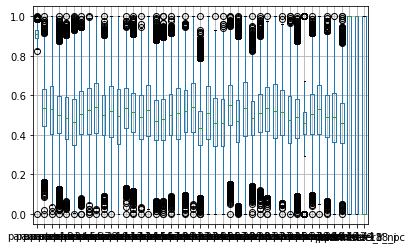

In [45]:
after_MinMax.boxplot()

In [46]:
df_MinMax=after_MinMax.copy()
df_MinMax_all=pd.concat([df_MinMax,df_target], axis=1)
df_MinMax_all

parameter1  parameter2  parameter3  parameter4  parameter5  parameter6  \
0        0.929270    0.610619    0.629000    0.423343    0.664427    0.529438   
1        0.892770    0.724844    0.512887    0.521607    0.914814    0.377667   
2        0.876648    0.635189    0.624543    0.438099    0.596351    0.475292   
3        0.954589    0.643501    0.702142    0.398511    0.396619    0.557009   
4        0.849529    0.617615    0.406323    0.499140    0.399928    0.417561   
...           ...         ...         ...         ...         ...         ...   
99984    0.904537    0.550364    0.572293    0.409220    0.658482    0.530915   
99985    0.965528    0.475461    0.495472    0.712727    0.314380    0.235808   
99986    0.889043    0.615694    0.393057    0.710989    0.436111    0.204622   
99987    0.936667    0.418331    0.253090    0.497016    0.603019    0.674491   
99988    0.942037    0.521340    0.367145    0.411773    0.515197    0.409455   

       parameter7  parameter8  parameter10  parameter11  parameter12  \
0        0.789884    0.349895     0.391225     0.579605     0.669186   
1        0.336085    0.605691     0.429521     0.401712     0.725236   
2        0.543724    0.574825     0.240724     0.618598     0.401588   
3        0.441281    0.654898     0.480259     0.374402     0.249297   
4        0.586805    0.568714     0.624348     0.392773     0.394756   
...           ...         ...          ...          ...          ...   
99984    0.556579    0.269583     0.888779     0.546133     0.472695   
99985    0.226382    0.510057     0.422826     0.580525     0.322776   
99986    0.543277    0.433845     0.531148     0.362851     0.509018   
99987    0.467503    0.445205     0.656039     0.608081     0.395662   
99988    0.525846    0.617821     0.652149     0.482541     0.480870   

       parameter13  parameter14  parameter15  parameter16  parameter17  \
0         0.186347     0.640887     0.324510     0.675997     0.528795   
1         0.630232     0.701136     0.300175     0.455652     0.495244   
2         0.511937     0.572917     0.365734     0.771740     0.579585   
3         0.734131     0.561517     0.591317     0.457941     0.364018   
4         0.521085     0.538728     0.588345     0.555510     0.739704   
...            ...          ...          ...          ...          ...   
99984     0.215727     0.621517     0.364700     0.433309     0.445460   
99985     0.263762     0.692585     0.309005     0.545882     0.623091   
99986     0.286847     0.637836     0.580315     0.644447     0.519927   
99987     0.658408     0.562309     0.608217     0.472167     0.219539   
99988     0.746534     0.338787     0.384430     0.420196     0.505660   

       parameter19  parameter20  parameter21  parameter22  parameter23  \
0         0.614617     0.503007     0.581589     0.681798     0.497669   
1         0.506079     0.302089     0.424849     0.612423     0.897842   
2         0.459192     0.429292     0.746820     0.428950     0.460612   
3         0.702895     0.447105     0.519197     0.493019     0.467965   
4         0.644530     0.522895     0.572513     0.592552     0.536397   
...            ...          ...          ...          ...          ...   
99984     0.610601     0.322031     0.680181     0.648981     0.674041   
99985     0.489645     0.312331     0.738290     0.219741     0.565468   
99986     0.225254     0.422920     0.731255     0.527120     0.786835   
99987     0.224305     0.547412     0.522499     0.588162     0.470211   
99988     0.237556     0.389647     0.412494     0.327261     0.582712   

       parameter24  parameter25  parameter26  parameter27  parameter28  \
0         0.711857     0.341612     0.432929     0.568006     0.269846   
1         0.679197     0.594831     0.761507     0.514817     0.554611   
2         0.744681     0.672521     0.712368     0.561689     0.635503   
3         0.509268     0.357409     0.540191     0.364360     0.658753   
4         0.665847   

# Exploratory Data Analysis

## Univariate analysis with box plot

parameter1


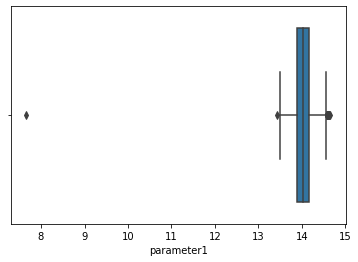

parameter2


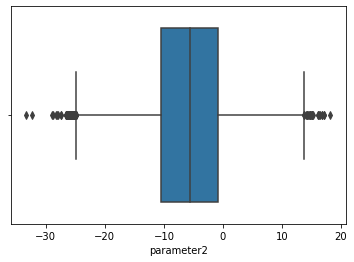

parameter3


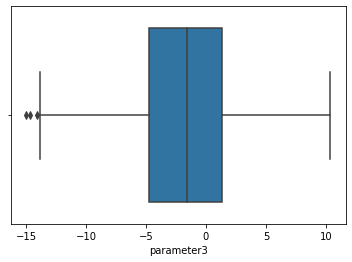

parameter4


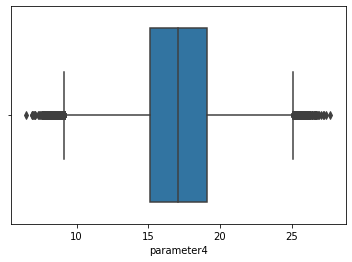

parameter5


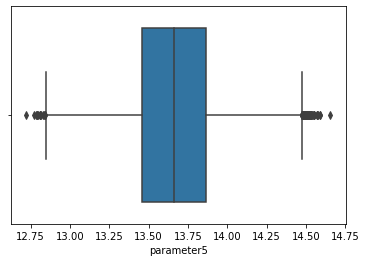

parameter6


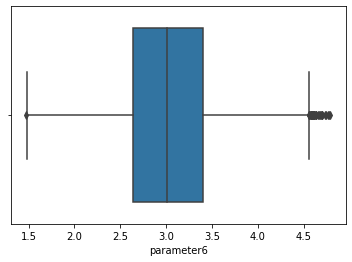

parameter7


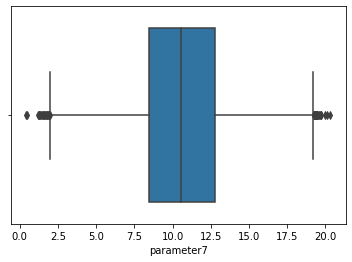

parameter8


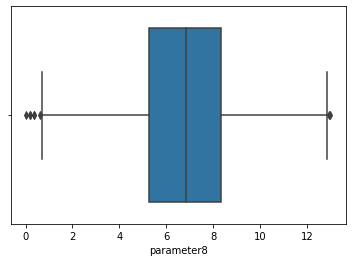

parameter10


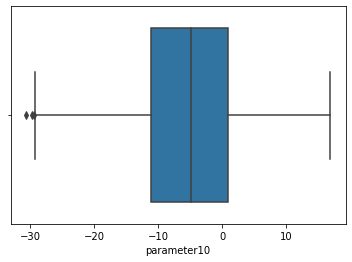

parameter11


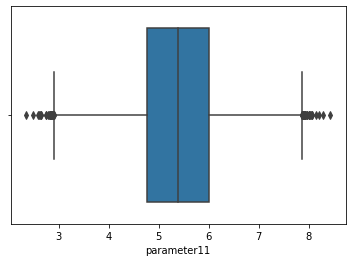

parameter12


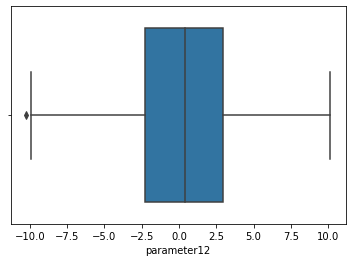

parameter13


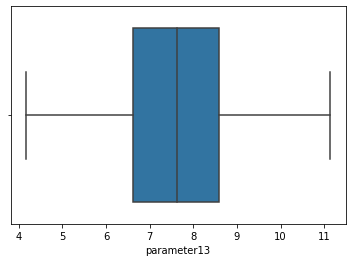

parameter14


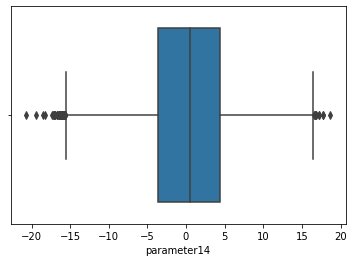

parameter15


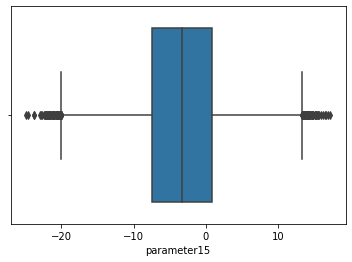

parameter16


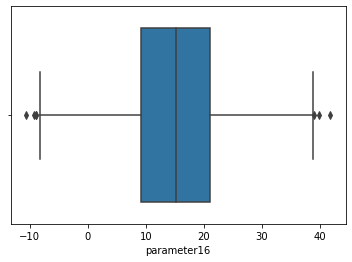

parameter17


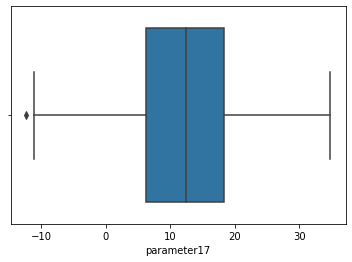

parameter19


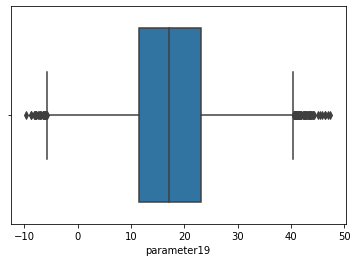

parameter20


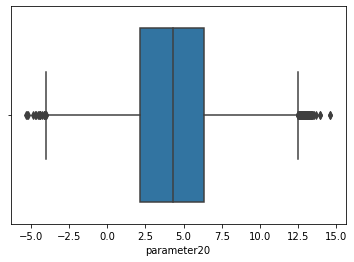

parameter21


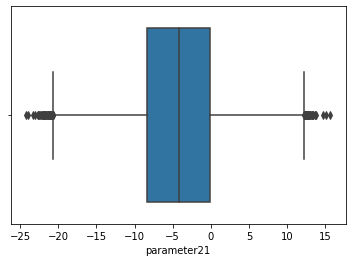

parameter22


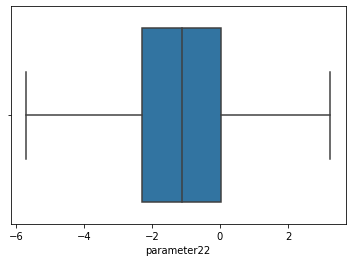

parameter23


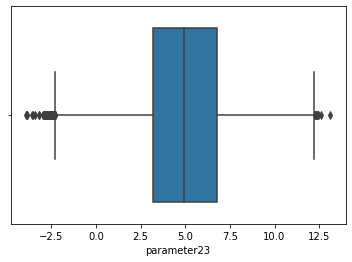

parameter24


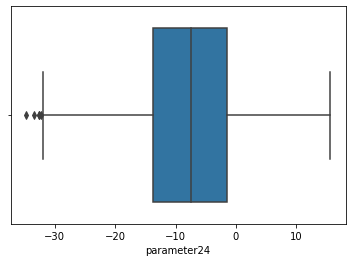

parameter25


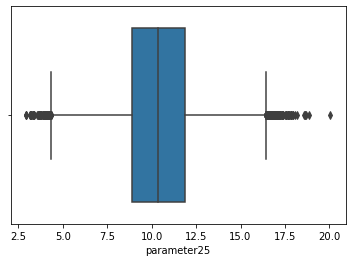

parameter26


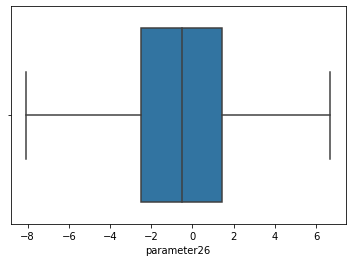

parameter27


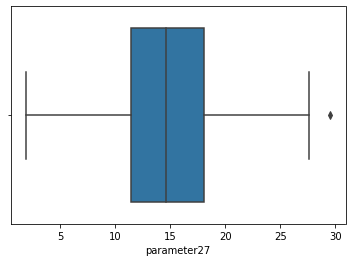

parameter28


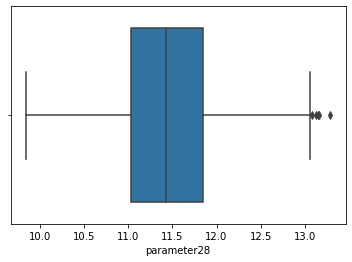

parameter29


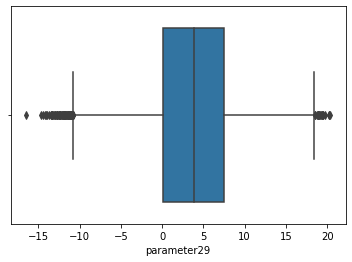

parameter30


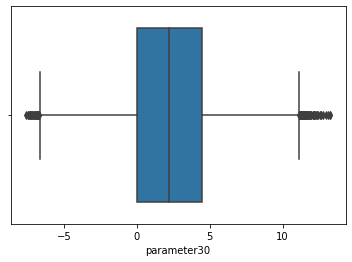

parameter31


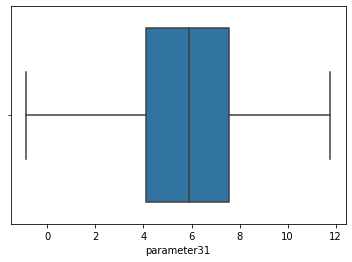

parameter32


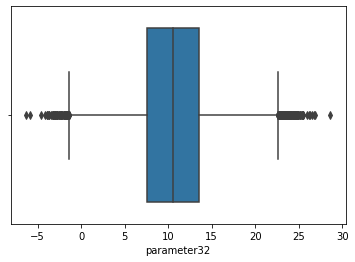

parameter33


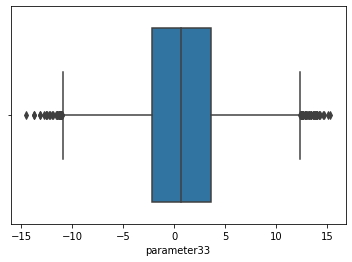

parameter34


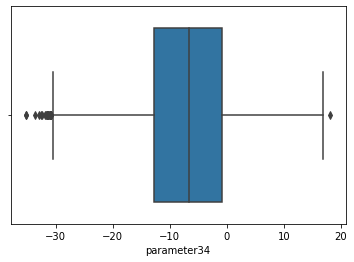

parameter35


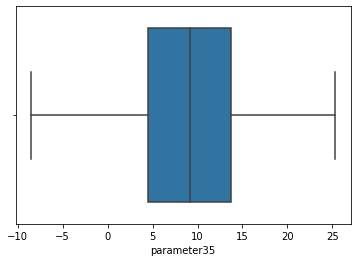

parameter36


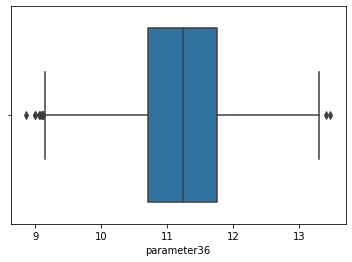

parameter37


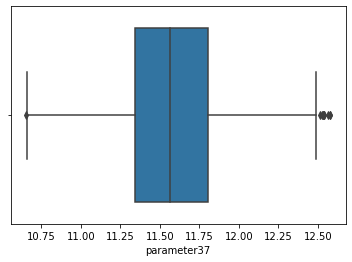

parameter38


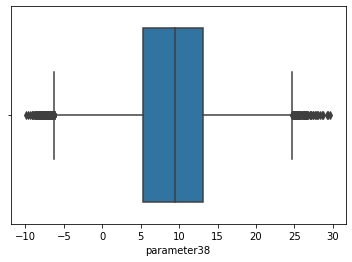

parameter39


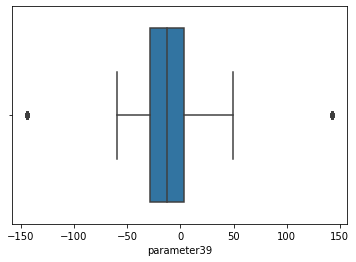

parameter40


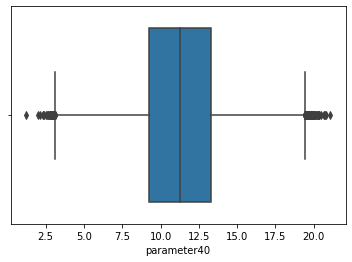

parameter41


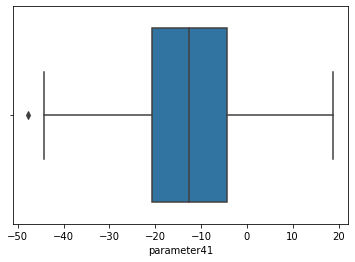

parameter42


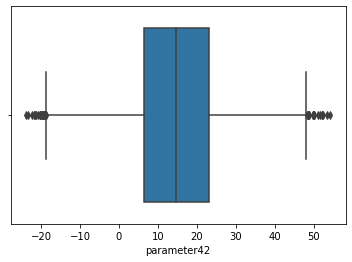

parameter43


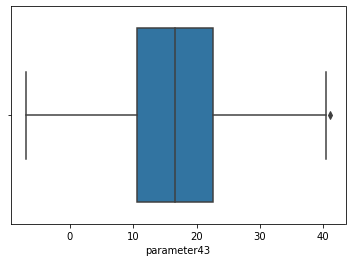

parameter44


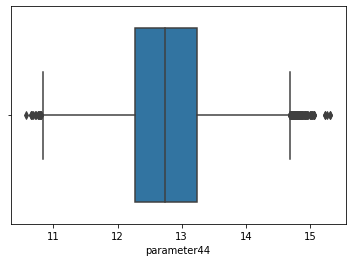

parameter9_Y


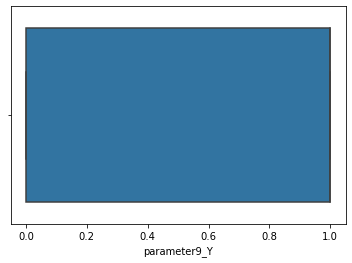

parameter18_ni


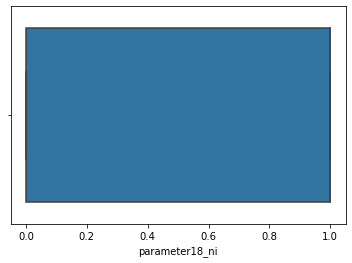

parameter18_pc


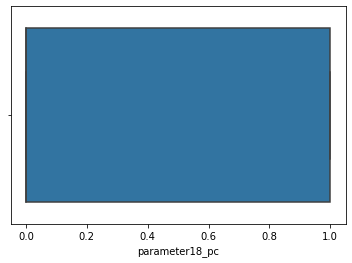

In [47]:
for col in data_final.columns:
    print(col)
    
    plt.figure()
    sns.boxplot(data_final[col])
    plt.show()

## Bivariate analysis with scatter plot

parameter1


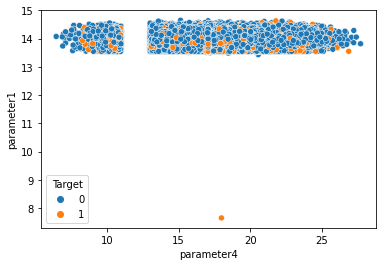

parameter2


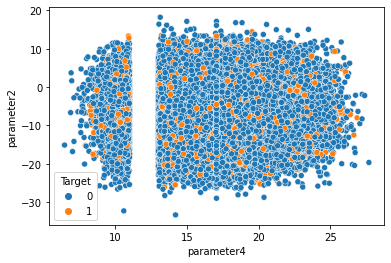

parameter3


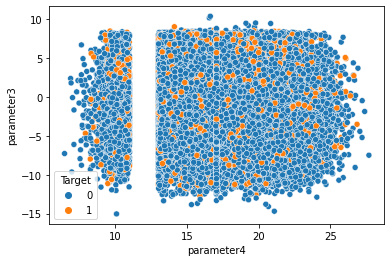

parameter4


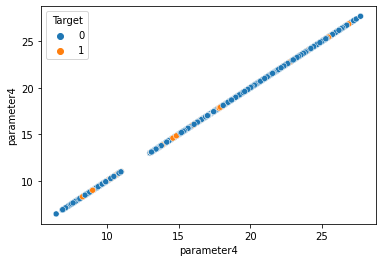

parameter5


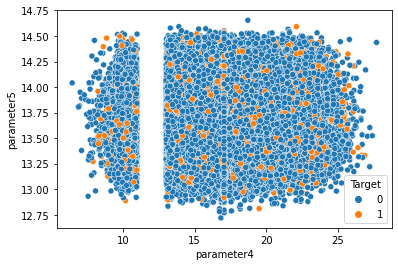

parameter6


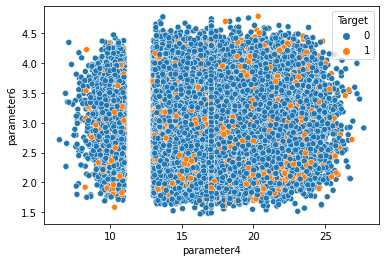

parameter7


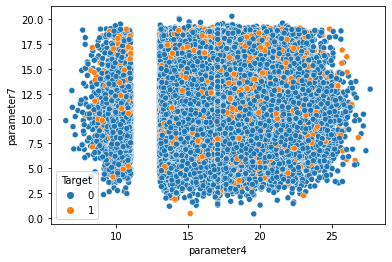

parameter8


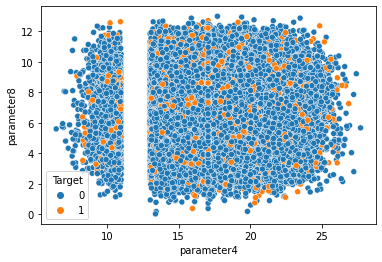

parameter10


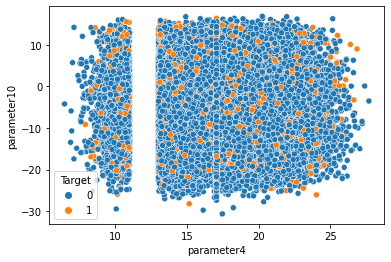

parameter11


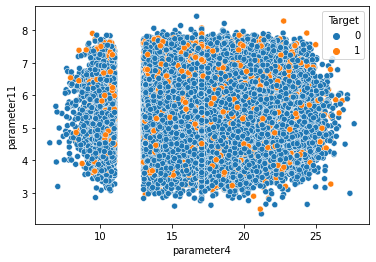

parameter12


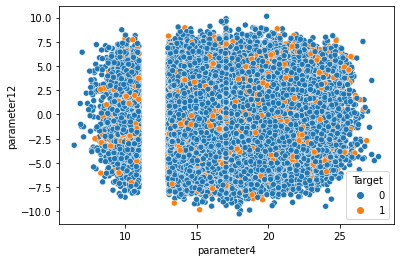

parameter13


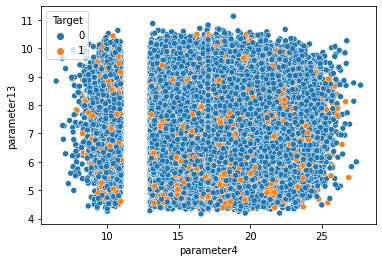

parameter14


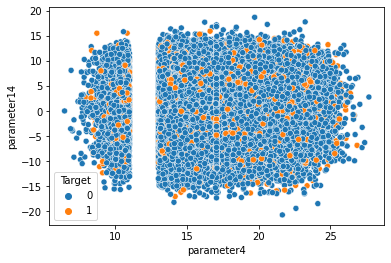

parameter15


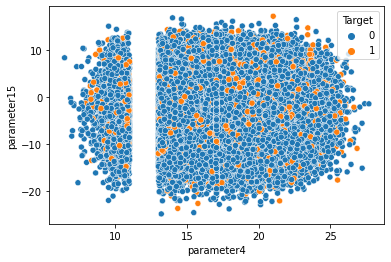

parameter16


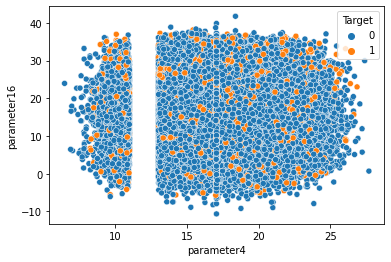

parameter17


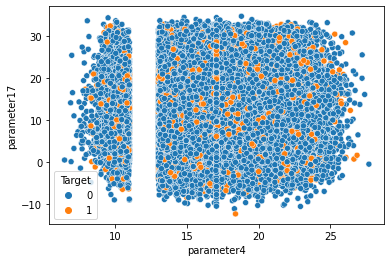

parameter19


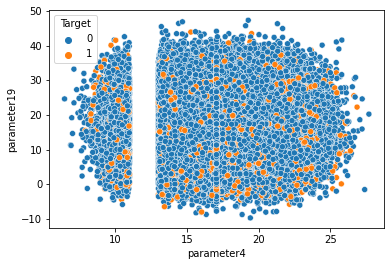

parameter20


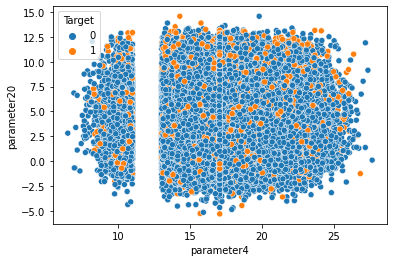

parameter21


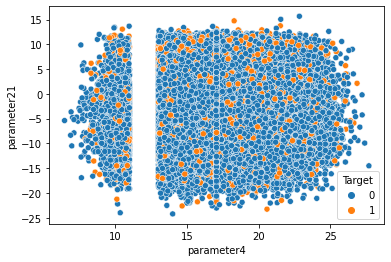

parameter22


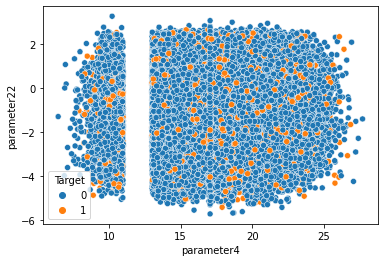

parameter23


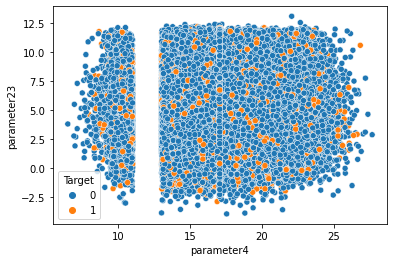

parameter24


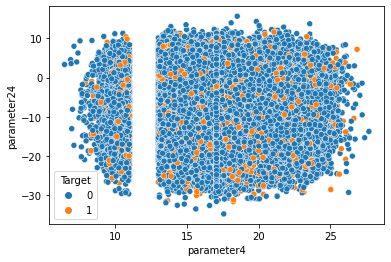

parameter25


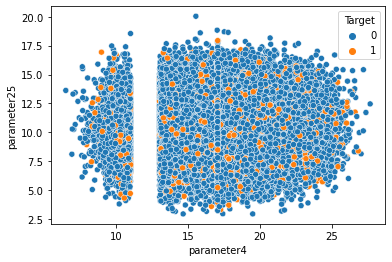

parameter26


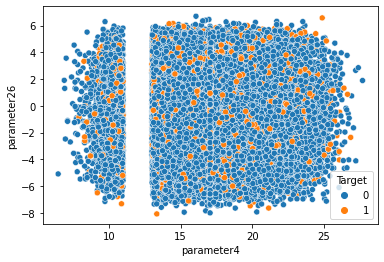

parameter27


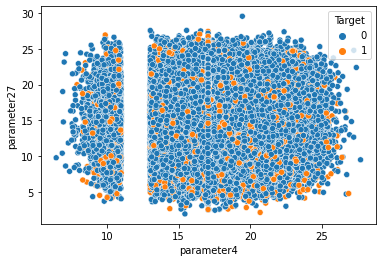

parameter28


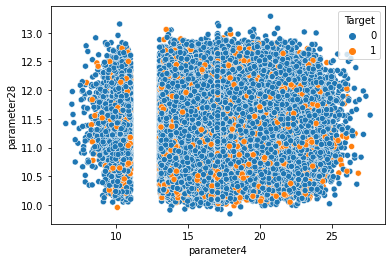

parameter29


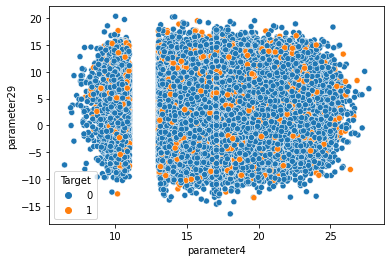

parameter30


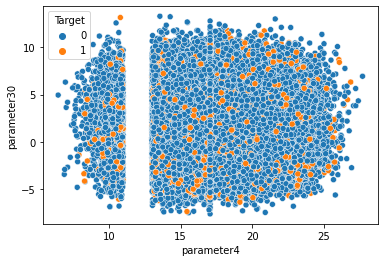

parameter31


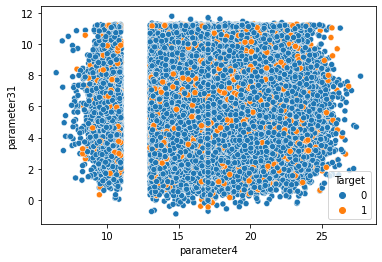

parameter32


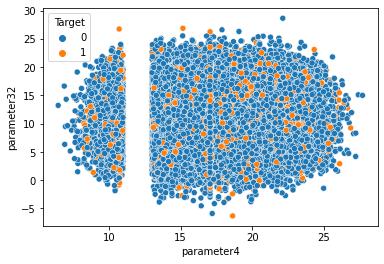

parameter33


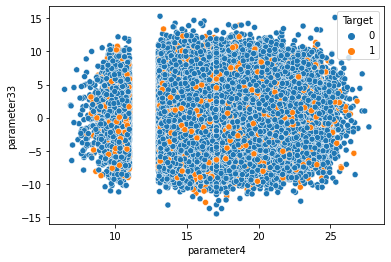

parameter34


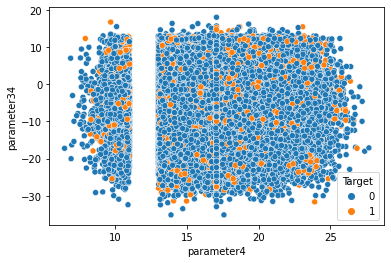

parameter35


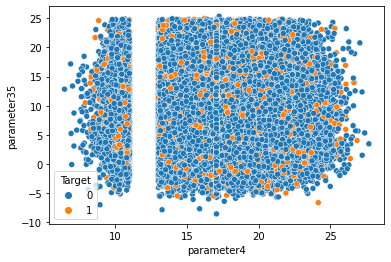

parameter36


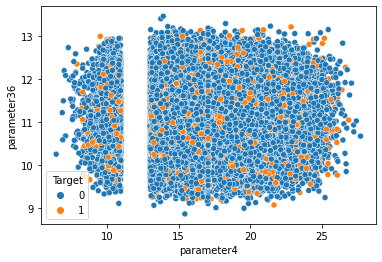

parameter37


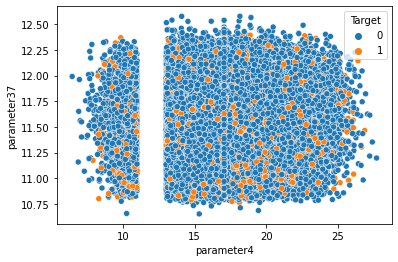

parameter38


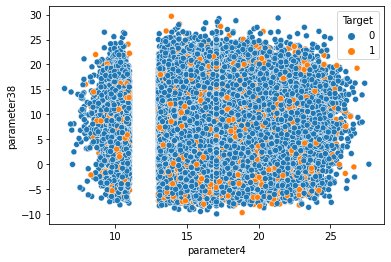

parameter39


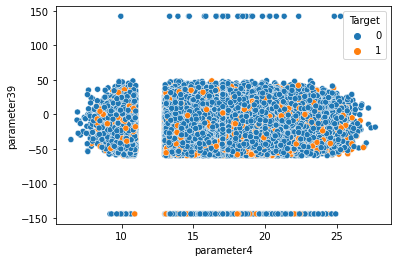

parameter40


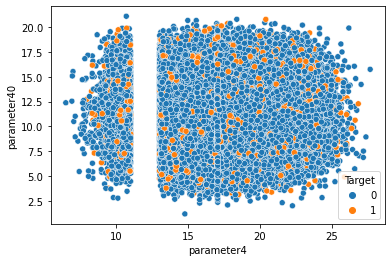

parameter41


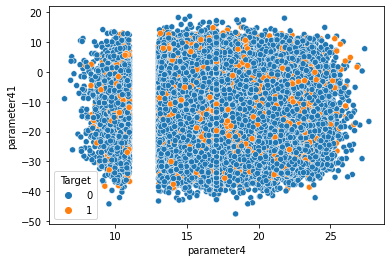

parameter42


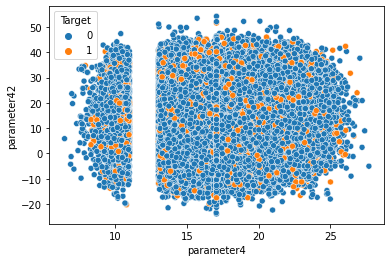

parameter43


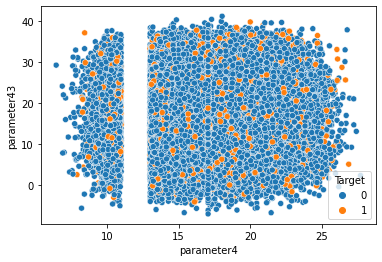

parameter44


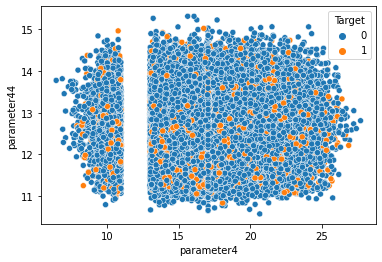

parameter9_Y


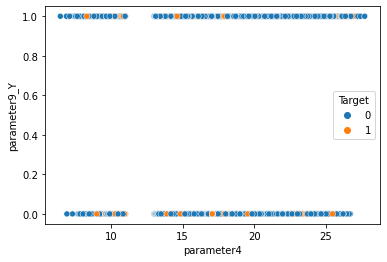

parameter18_ni


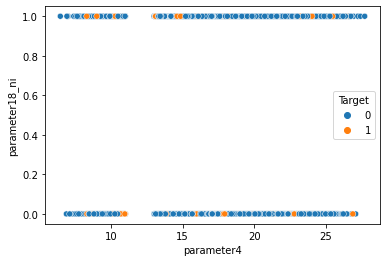

parameter18_pc


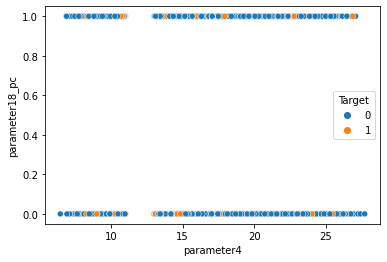

Target


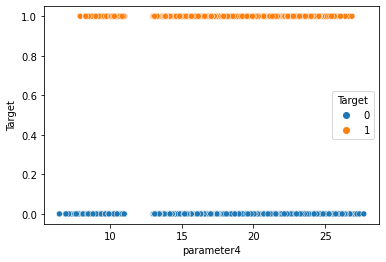

In [48]:
col=[]
for col in clean_data.columns:
    print(col)
    
    plt.figure()
    sns.scatterplot(x=clean_data.parameter4,y=clean_data[col],hue=clean_data.Target)
    col=+1
    plt.show()

# Heatmap

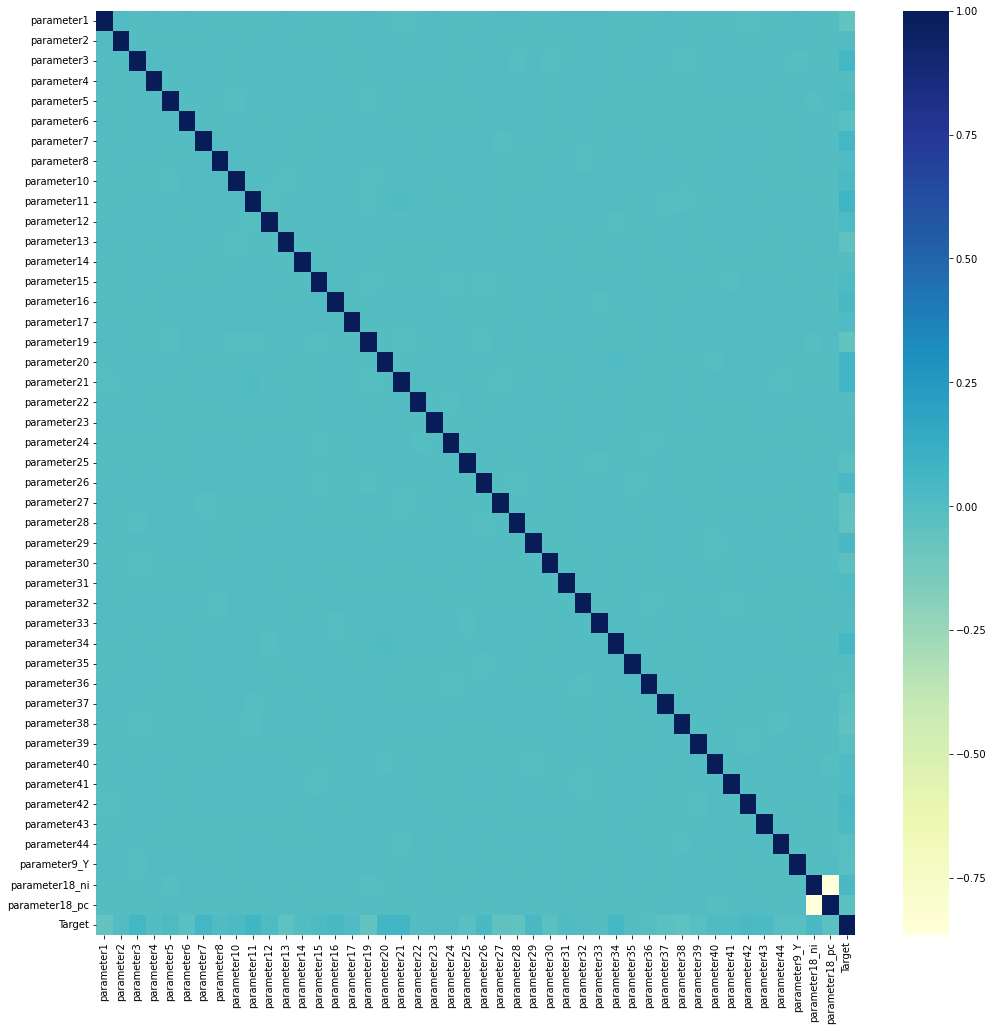

In [54]:
plt.figure(figsize=(17,17))
sns.heatmap(clean_data.corr(),cmap="YlGnBu")
plt.show()

## Splitting dataset for further analysis

In [56]:
X = clean_data.drop('Target',axis = 1)
y = clean_data[['Target']]
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (99989, 45)
Shape of y: (99989, 1)


## PCA before SMOTE

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X.values)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [58]:
finalDf = pd.concat([principalDf,y], axis = 1)
finalDf

principal component 1  principal component 2  Target
0                 -10.664837               6.956442       0
1                 -17.959306              10.867998       0
2                  16.630046              -8.862454       0
3                 -26.000246               4.525014       0
4                  31.475701             -12.339236       1
...                      ...                    ...     ...
99984              11.098050             -23.012856       0
99985             -14.115284              11.248211       0
99986             -36.414738               1.745977       0
99987             -29.920401              12.196301       0
99988               6.423885              -3.007864       0

[99989 rows x 3 columns]

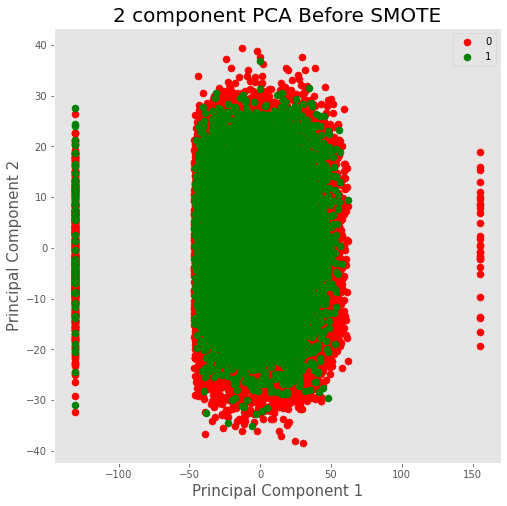

In [60]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Before SMOTE', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = clean_data['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Train-test split for further analysis

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (79991, 45)
Number transactions y_train dataset:  (79991, 1)
Number transactions X_test dataset:  (19998, 45)
Number transactions y_test dataset:  (19998, 1)


# SMOTE Technique (Over-Sampling)
>SMOTE stands for Synthetic Minority Over-sampling Technique. 
SMOTE creates new synthetic points in order to have an equal balance of the classes. 
This is another alternative for solving the "class imbalance problems".
## SMOTE:

>Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.

>Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.

>Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.

>Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.


In [63]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
print(y_train.value_counts())
print(y_train_res.value_counts())

After OverSampling, the shape of train_X: (143734, 45)
After OverSampling, the shape of train_y: (143734, 1) 

Target
0         71867
1          8124
dtype: int64
Target
0         71867
1         71867
dtype: int64


## PCA after SMOTE

In [65]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_train_res.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [66]:
finalDf = pd.concat([principalDf, y_train_res], axis = 1)
finalDf

principal component 1  principal component 2  Target
0                    6.911263               0.684356       0
1                  -19.676016             -12.064443       0
2                   11.317405              11.942078       0
3                   -9.830734              -8.806061       0
4                   26.986813               3.983731       0
...                       ...                    ...     ...
143729               6.635711              -3.366477       1
143730             -12.080635              -7.978808       1
143731             -18.732376             -11.197160       1
143732              20.703372               8.295111       1
143733             -21.693711               8.861451       1

[143734 rows x 3 columns]

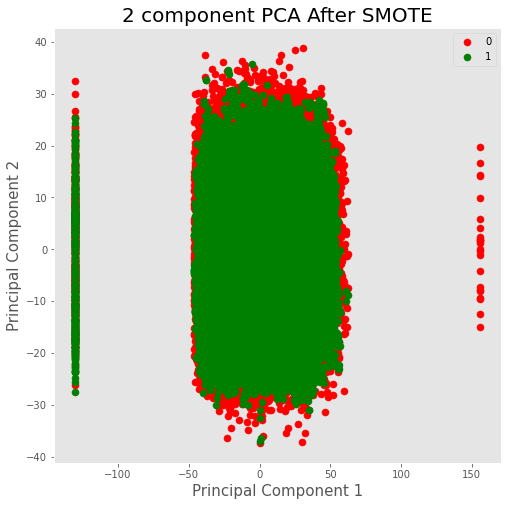

In [67]:
# 2D visualization
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA After SMOTE', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [68]:
X_train_res_copy=X_train_res.copy()
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_res_copy)
scaled_features = scaler.transform(X_train_res_copy)
#Convert to table format - MinMaxScaler
X_train_res_MinMax = pd.DataFrame(data=scaled_features, columns=X_train_res_copy.columns)
X_train_res_MinMax

parameter1  parameter2  parameter3  parameter4  parameter5  \
0         0.920973    0.696841    0.460323    0.546887    0.537734   
1         0.946178    0.414905    0.725600    0.384114    0.434560   
2         0.842704    0.525716    0.402286    0.552649    0.497829   
3         0.843046    0.491924    0.250517    0.177085    0.135067   
4         0.951547    0.484694    0.567313    0.774876    0.487853   
...            ...         ...         ...         ...         ...   
143729    0.882908    0.455137    0.463965    0.425367    0.342460   
143730    0.888466    0.487205    0.203626    0.536133    0.500522   
143731    0.929144    0.373258    0.547549    0.436968    0.481916   
143732    0.870334    0.586430    0.475408    0.539575    0.353136   
143733    0.923242    0.488045    0.527712    0.428796    0.572761   

        parameter6  parameter7  parameter8  parameter10  parameter11  \
0         0.549807    0.415291    0.521155     0.502955     0.382125   
1         0.230174    0.479031    0.739388     0.734291     0.520515   
2         0.391407    0.310343    0.562055     0.693353     0.557931   
3         0.679041    0.431211    0.526033     0.499134     0.593145   
4         0.570387    0.444603    0.335530     0.496497     0.378576   
...            ...         ...         ...          ...          ...   
143729    0.542854    0.521789    0.623919     0.752042     0.593292   
143730    0.534106    0.305796    0.699910     0.357379     0.550892   
143731    0.373329    0.380872    0.241135     0.560401     0.601618   
143732    0.557766    0.610026    0.496154     0.709781     0.665718   
143733    0.548973    0.581480    0.508624     0.502508     0.785209   

        parameter12  parameter13  parameter14  parameter15  parameter16  \
0          0.642009     0.358498     0.549695     0.512469     0.352599   
1          0.725021     0.619454     0.501138     0.556456     0.631004   
2          0.467348     0.547748     0.766495     0.505815     0.448694   
3          0.501343     0.373878     0.551725     0.454579     0.725001   
4          0.480689     0.616703     0.375617     0.483537     0.823048   
...             ...          ...          ...          ...          ...   
143729     0.425014     0.499287     0.536156     0.767861     0.504392   
143730     0.696729     0.413054     0.463082     0.544666     0.671731   
143731     0.521348     0.328832     0.599734     0.344377     0.755140   
143732     0.732775     0.638365     0.350934     0.625764     0.538977   
143733     0.509633     0.576612     0.436275     0.623481     0.378829   

        parameter17  parameter19  parameter20  parameter21  parameter22  \
0          0.535525     0.603671     0.738168     0.707274     0.476130   
1          0.190894     0.375485     0.495627     0.427685     0.238897   
2          0.684362     0.350678     0.460647     0.485731     0.599086   
3          0.706508     0.219710     0.379937     0.280496     0.590396   
4          0.653660     0.499775     0.421610     0.533684     0.455489   
...             ...          ...          ...          ...          ...   
143729     0.425678     0.327387     0.443599     0.490746     0.535282   
143730     0.488491     0.314744     0.281211     0.566925     0.575480   
143731     0.472535     0.440708     0.565740     0.583053     0.576869   
143732     0.645387     0.447857     0.456491     0.664888     0.619937   
143733     0.579498     0.316313     0.462689     0.246428     0.553881   

        parameter23  parameter24  parameter25  parameter26  parameter27  \
0          0.455406     0.571314     0.490238     0.575467     0.318475   
1          0.732147     0.620020     0.495820     0.441068     0.602111   
2          0.290984     0.297042     0.530341     0.395631     0.483132   
3          0.531489     0.645140     0.518970     0.489699     0.652474   
4          0.669075     0.726384     0.548368     0.559398     0.407502   
...             ...          ...          ...     

In [70]:
_df_continuous_res= X_train_res_MinMax.drop(['parameter9_Y', 'parameter18_ni', 'parameter18_pc'], axis=1)
_df_categorical_res= X_train_res_MinMax[['parameter9_Y', 'parameter18_ni', 'parameter18_pc']]
df_after_smote= pd.concat([X_train_res_MinMax,y_train_res], axis=1)  #smote data with all columns
_df_continuous_res

parameter1  parameter2  parameter3  parameter4  parameter5  \
0         0.920973    0.696841    0.460323    0.546887    0.537734   
1         0.946178    0.414905    0.725600    0.384114    0.434560   
2         0.842704    0.525716    0.402286    0.552649    0.497829   
3         0.843046    0.491924    0.250517    0.177085    0.135067   
4         0.951547    0.484694    0.567313    0.774876    0.487853   
...            ...         ...         ...         ...         ...   
143729    0.882908    0.455137    0.463965    0.425367    0.342460   
143730    0.888466    0.487205    0.203626    0.536133    0.500522   
143731    0.929144    0.373258    0.547549    0.436968    0.481916   
143732    0.870334    0.586430    0.475408    0.539575    0.353136   
143733    0.923242    0.488045    0.527712    0.428796    0.572761   

        parameter6  parameter7  parameter8  parameter10  parameter11  \
0         0.549807    0.415291    0.521155     0.502955     0.382125   
1         0.230174    0.479031    0.739388     0.734291     0.520515   
2         0.391407    0.310343    0.562055     0.693353     0.557931   
3         0.679041    0.431211    0.526033     0.499134     0.593145   
4         0.570387    0.444603    0.335530     0.496497     0.378576   
...            ...         ...         ...          ...          ...   
143729    0.542854    0.521789    0.623919     0.752042     0.593292   
143730    0.534106    0.305796    0.699910     0.357379     0.550892   
143731    0.373329    0.380872    0.241135     0.560401     0.601618   
143732    0.557766    0.610026    0.496154     0.709781     0.665718   
143733    0.548973    0.581480    0.508624     0.502508     0.785209   

        parameter12  parameter13  parameter14  parameter15  parameter16  \
0          0.642009     0.358498     0.549695     0.512469     0.352599   
1          0.725021     0.619454     0.501138     0.556456     0.631004   
2          0.467348     0.547748     0.766495     0.505815     0.448694   
3          0.501343     0.373878     0.551725     0.454579     0.725001   
4          0.480689     0.616703     0.375617     0.483537     0.823048   
...             ...          ...          ...          ...          ...   
143729     0.425014     0.499287     0.536156     0.767861     0.504392   
143730     0.696729     0.413054     0.463082     0.544666     0.671731   
143731     0.521348     0.328832     0.599734     0.344377     0.755140   
143732     0.732775     0.638365     0.350934     0.625764     0.538977   
143733     0.509633     0.576612     0.436275     0.623481     0.378829   

        parameter17  parameter19  parameter20  parameter21  parameter22  \
0          0.535525     0.603671     0.738168     0.707274     0.476130   
1          0.190894     0.375485     0.495627     0.427685     0.238897   
2          0.684362     0.350678     0.460647     0.485731     0.599086   
3          0.706508     0.219710     0.379937     0.280496     0.590396   
4          0.653660     0.499775     0.421610     0.533684     0.455489   
...             ...          ...          ...          ...          ...   
143729     0.425678     0.327387     0.443599     0.490746     0.535282   
143730     0.488491     0.314744     0.281211     0.566925     0.575480   
143731     0.472535     0.440708     0.565740     0.583053     0.576869   
143732     0.645387     0.447857     0.456491     0.664888     0.619937   
143733     0.579498     0.316313     0.462689     0.246428     0.553881   

        parameter23  parameter24  parameter25  parameter26  parameter27  \
0          0.455406     0.571314     0.490238     0.575467     0.318475   
1          0.732147     0.620020     0.495820     0.441068     0.602111   
2          0.290984     0.297042     0.530341     0.395631     0.483132   
3          0.531489     0.645140     0.518970     0.489699     0.652474   
4          0.669075     0.726384     0.548368     0.559398     0.407502   
...             ...          ...          ...     

# Feature selection 1 
## - Sequential Feature selection

In [45]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=5)

sfs2 = SFS(model,
           n_features_to_select=10,
           direction='forward',
           scoring='accuracy',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(_df_continuous_res, y_train_res)
print("Selected features: %s" % list(_df_continuous_res.columns[sfs2.support_]))

Selected features: ['parameter1', 'parameter4', 'parameter10', 'parameter16', 'parameter17', 'parameter19', 'parameter34', 'parameter39', 'parameter41', 'parameter42']


In [71]:
#df_MinMax_all
fs1_data=df_after_smote[['parameter1', 'parameter4', 'parameter10', 'parameter16', 'parameter17', 'parameter19', 'parameter34',
                     'parameter39', 'parameter41', 'parameter42','parameter9_Y','parameter18_ni','parameter18_pc','Target']]
fs1_data

parameter1  parameter4  parameter10  parameter16  parameter17  \
0         0.920973    0.546887     0.502955     0.352599     0.535525   
1         0.946178    0.384114     0.734291     0.631004     0.190894   
2         0.842704    0.552649     0.693353     0.448694     0.684362   
3         0.843046    0.177085     0.499134     0.725001     0.706508   
4         0.951547    0.774876     0.496497     0.823048     0.653660   
...            ...         ...          ...          ...          ...   
143729    0.882908    0.425367     0.752042     0.504392     0.425678   
143730    0.888466    0.536133     0.357379     0.671731     0.488491   
143731    0.929144    0.436968     0.560401     0.755140     0.472535   
143732    0.870334    0.539575     0.709781     0.538977     0.645387   
143733    0.923242    0.428796     0.502508     0.378829     0.579498   

        parameter19  parameter34  parameter39  parameter41  parameter42  \
0          0.603671     0.526277     0.479510     0.684122     0.505000   
1          0.375485     0.528602     0.386994     0.402900     0.668909   
2          0.350678     0.227195     0.494739     0.163293     0.355080   
3          0.219710     0.501762     0.421700     0.840070     0.626549   
4          0.499775     0.516163     0.549711     0.470889     0.457184   
...             ...          ...          ...          ...          ...   
143729     0.327387     0.403315     0.478923     0.586871     0.551587   
143730     0.314744     0.584720     0.413635     0.646155     0.616781   
143731     0.440708     0.487120     0.390258     0.643416     0.656456   
143732     0.447857     0.776900     0.527721     0.695851     0.400193   
143733     0.316313     0.446471     0.379435     0.527865     0.397629   

        parameter9_Y  parameter18_ni  parameter18_pc  Target  
0                0.0             1.0             0.0       0  
1                0.0             1.0             0.0       0  
2                1.0             1.0             0.0       0  
3                1.0             0.0             1.0       0  
4                1.0             0.0             0.0       0  
...              ...             ...             ...     ...  
143729           1.0             0.0             0.0       1  
143730           1.0             1.0             0.0       1  
143731           0.0             0.0             0.0       1  
143732           1.0             1.0             0.0       1  
143733           1.0             1.0             0.0       1  

[143734 rows x 14 columns]

# Feature selection 2 
## - RFECV

Using DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFECV
clf_lr=DecisionTreeClassifier()
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')    #5-fold cross-validation
rfecv = rfecv.fit(_df_continuous_res, y_train_res)
print('Optimal number of features :', rfecv.n_features_)
#print('Best features :', _df_continuous_res.columns[rfecv.support_])
print("Selected features: %s" % list(_df_continuous_res.columns[rfecv.support_]))

Optimal number of features : 42
Selected features: ['parameter1', 'parameter2', 'parameter3', 'parameter4', 'parameter5', 'parameter6', 'parameter7', 'parameter8', 'parameter10', 'parameter11', 'parameter12', 'parameter13', 'parameter14', 'parameter15', 'parameter16', 'parameter17', 'parameter19', 'parameter20', 'parameter21', 'parameter22', 'parameter23', 'parameter24', 'parameter25', 'parameter26', 'parameter27', 'parameter28', 'parameter29', 'parameter30', 'parameter31', 'parameter32', 'parameter33', 'parameter34', 'parameter35', 'parameter36', 'parameter37', 'parameter38', 'parameter39', 'parameter40', 'parameter41', 'parameter42', 'parameter43', 'parameter44']


Using LogisticRegression

In [72]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
clf_lr=LogisticRegression()
rfecv = RFECV(estimator=clf_lr, step=1, cv=5, scoring='accuracy')    #5-fold cross-validation
rfecv = rfecv.fit(_df_continuous_res, y_train_res)
print('Optimal number of features :', rfecv.n_features_)
#print('Best features :', _df_continuous_res.columns[rfecv.support_])
print("Selected features: %s" % list(_df_continuous_res.columns[rfecv.support_]))

Optimal number of features : 41
Selected features: ['parameter1', 'parameter2', 'parameter3', 'parameter4', 'parameter5', 'parameter6', 'parameter7', 'parameter8', 'parameter10', 'parameter11', 'parameter12', 'parameter13', 'parameter14', 'parameter15', 'parameter16', 'parameter17', 'parameter19', 'parameter20', 'parameter21', 'parameter22', 'parameter23', 'parameter24', 'parameter25', 'parameter26', 'parameter27', 'parameter28', 'parameter29', 'parameter30', 'parameter31', 'parameter32', 'parameter33', 'parameter34', 'parameter36', 'parameter37', 'parameter38', 'parameter39', 'parameter40', 'parameter41', 'parameter42', 'parameter43', 'parameter44']


In [75]:
fs2_data=df_after_smote[['parameter1', 'parameter2', 'parameter3', 'parameter4', 'parameter5', 'parameter6', 'parameter7',
                         'parameter8', 'parameter10', 'parameter11', 'parameter12', 'parameter13', 'parameter14', 'parameter15',
                         'parameter16', 'parameter17', 'parameter19', 'parameter20', 'parameter21', 'parameter22',
                         'parameter23', 'parameter24', 'parameter25', 'parameter26', 'parameter27', 'parameter28',
                         'parameter29', 'parameter30', 'parameter31', 'parameter32', 'parameter33', 'parameter34', 
                         'parameter35', 'parameter36', 'parameter37', 'parameter38', 'parameter39', 'parameter40',
                         'parameter41', 'parameter42', 'parameter43', 'parameter44','parameter9_Y','parameter18_ni',
                         'parameter18_pc','Target']]
fs2_data

parameter1  parameter2  parameter3  parameter4  parameter5  \
0         0.920973    0.696841    0.460323    0.546887    0.537734   
1         0.946178    0.414905    0.725600    0.384114    0.434560   
2         0.842704    0.525716    0.402286    0.552649    0.497829   
3         0.843046    0.491924    0.250517    0.177085    0.135067   
4         0.951547    0.484694    0.567313    0.774876    0.487853   
...            ...         ...         ...         ...         ...   
143729    0.882908    0.455137    0.463965    0.425367    0.342460   
143730    0.888466    0.487205    0.203626    0.536133    0.500522   
143731    0.929144    0.373258    0.547549    0.436968    0.481916   
143732    0.870334    0.586430    0.475408    0.539575    0.353136   
143733    0.923242    0.488045    0.527712    0.428796    0.572761   

        parameter6  parameter7  parameter8  parameter10  parameter11  \
0         0.549807    0.415291    0.521155     0.502955     0.382125   
1         0.230174    0.479031    0.739388     0.734291     0.520515   
2         0.391407    0.310343    0.562055     0.693353     0.557931   
3         0.679041    0.431211    0.526033     0.499134     0.593145   
4         0.570387    0.444603    0.335530     0.496497     0.378576   
...            ...         ...         ...          ...          ...   
143729    0.542854    0.521789    0.623919     0.752042     0.593292   
143730    0.534106    0.305796    0.699910     0.357379     0.550892   
143731    0.373329    0.380872    0.241135     0.560401     0.601618   
143732    0.557766    0.610026    0.496154     0.709781     0.665718   
143733    0.548973    0.581480    0.508624     0.502508     0.785209   

        parameter12  parameter13  parameter14  parameter15  parameter16  \
0          0.642009     0.358498     0.549695     0.512469     0.352599   
1          0.725021     0.619454     0.501138     0.556456     0.631004   
2          0.467348     0.547748     0.766495     0.505815     0.448694   
3          0.501343     0.373878     0.551725     0.454579     0.725001   
4          0.480689     0.616703     0.375617     0.483537     0.823048   
...             ...          ...          ...          ...          ...   
143729     0.425014     0.499287     0.536156     0.767861     0.504392   
143730     0.696729     0.413054     0.463082     0.544666     0.671731   
143731     0.521348     0.328832     0.599734     0.344377     0.755140   
143732     0.732775     0.638365     0.350934     0.625764     0.538977   
143733     0.509633     0.576612     0.436275     0.623481     0.378829   

        parameter17  parameter19  parameter20  parameter21  parameter22  \
0          0.535525     0.603671     0.738168     0.707274     0.476130   
1          0.190894     0.375485     0.495627     0.427685     0.238897   
2          0.684362     0.350678     0.460647     0.485731     0.599086   
3          0.706508     0.219710     0.379937     0.280496     0.590396   
4          0.653660     0.499775     0.421610     0.533684     0.455489   
...             ...          ...          ...          ...          ...   
143729     0.425678     0.327387     0.443599     0.490746     0.535282   
143730     0.488491     0.314744     0.281211     0.566925     0.575480   
143731     0.472535     0.440708     0.565740     0.583053     0.576869   
143732     0.645387     0.447857     0.456491     0.664888     0.619937   
143733     0.579498     0.316313     0.462689     0.246428     0.553881   

        parameter23  parameter24  parameter25  parameter26  parameter27  \
0          0.455406     0.571314     0.490238     0.575467     0.318475   
1          0.732147     0.620020     0.495820     0.441068     0.602111   
2          0.290984     0.297042     0.530341     0.395631     0.483132   
3          0.531489     0.645140     0.518970     0.489699     0.652474   
4          0.669075     0.726384     0.548368     0.559398     0.407502   
...             ...          ...          ...     

# Feature selection for categorical columns 
## - chi2

In [76]:
from sklearn.feature_selection import chi2
fs =chi2(_df_categorical_res,y_train_res)

selected_var=[]
print('if p-value<0.05 : Reject the null hypothesis./we can not remove the column \nif p-value>0.05 :Fail to relect the null hypothesis.\n')
for i,j in enumerate(_df_categorical_res.columns):
    print(f'Null hypothesis: There is no significant difference between the mean {j} among different groups of Class.')
    print(f'Alternate Hypothesis: There is a significant difference between the mean {j} among different groups of Class.')
    if fs[1][i]<0.05:#p-values<0.05
        print(f'{j} : Reject the null hypothesis.\n')
    else:
        print(f'{j} : Fail to reject the null hypothesis.\n')
        selected_var.append(j)

if p-value<0.05 : Reject the null hypothesis./we can not remove the column 
if p-value>0.05 :Fail to relect the null hypothesis.

Null hypothesis: There is no significant difference between the mean parameter9_Y among different groups of Class.
Alternate Hypothesis: There is a significant difference between the mean parameter9_Y among different groups of Class.
parameter9_Y : Reject the null hypothesis.

Null hypothesis: There is no significant difference between the mean parameter18_ni among different groups of Class.
Alternate Hypothesis: There is a significant difference between the mean parameter18_ni among different groups of Class.
parameter18_ni : Reject the null hypothesis.

Null hypothesis: There is no significant difference between the mean parameter18_pc among different groups of Class.
Alternate Hypothesis: There is a significant difference between the mean parameter18_pc among different groups of Class.
parameter18_pc : Reject the null hypothesis.



# DBSCAN + FS2

In [77]:
from sklearn.preprocessing import MinMaxScaler

fs2=['parameter1', 'parameter2', 'parameter3', 'parameter4', 'parameter5', 'parameter6', 'parameter7',
                         'parameter8', 'parameter10', 'parameter11', 'parameter12', 'parameter13', 'parameter14', 'parameter15',
                         'parameter16', 'parameter17', 'parameter19', 'parameter20', 'parameter21', 'parameter22',
                         'parameter23', 'parameter24', 'parameter25', 'parameter26', 'parameter27', 'parameter28',
                         'parameter29', 'parameter30', 'parameter31', 'parameter32', 'parameter33', 'parameter34', 
                         'parameter35', 'parameter36', 'parameter37', 'parameter38', 'parameter39', 'parameter40',
                         'parameter41', 'parameter42', 'parameter43', 'parameter44','parameter9_Y','parameter18_ni',
                         'parameter18_pc']
df_db2 = data_final[fs2].values.astype(np.float)
scaler = MinMaxScaler()
fs2_dbscan = scaler.fit_transform(df_db2)

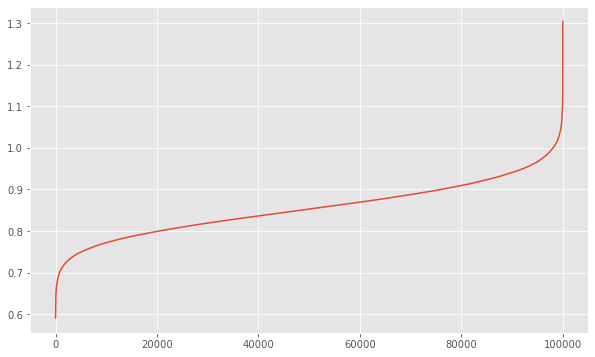

In [80]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=43) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(fs2_dbscan) # fitting the data to the object
distances,indices=nbrs.kneighbors(fs2_dbscan) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (10,6) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [83]:
import sklearn.metrics as metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.05, min_samples=43, n_jobs=-1).fit(fs2_dbscan)

# Get the cluster labels (aka numbers)
pred_labels = db.labels_

# Count the total number of clusters
n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)

# Print model results
print(f'Estimated number of clusters: {n_clusters_}')

# Print model results
print(f'Silhouette Coefficient: {metrics.silhouette_score(fs2_dbscan, pred_labels):0.3f}')

# Get sample counts in each cluster 
counts = np.bincount(pred_labels[pred_labels>=0])
print(counts)

Estimated number of clusters: 6
Silhouette Coefficient: 0.191
[26302 43231  8751 14632  4991  1567]


In [84]:
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[26302 43231  8751 14632  4991  1567]


In [85]:
smallest_clusters = np.argsort(counts)[:3]
print(f'The smallest clusters are clusters: {smallest_clusters}')


The smallest clusters are clusters: [5 4 2]


In [86]:
print(f'Their counts are: {counts[smallest_clusters]}')


Their counts are: [1567 4991 8751]


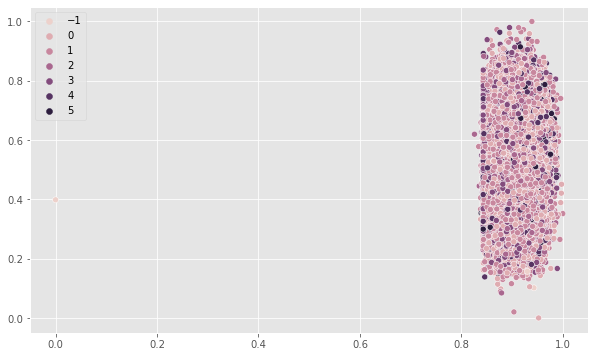

In [88]:
sns.scatterplot(x=fs2_dbscan[:, 0], y=fs2_dbscan[:, 1], hue=pred_labels,cmap= "plasma")
plt.show()

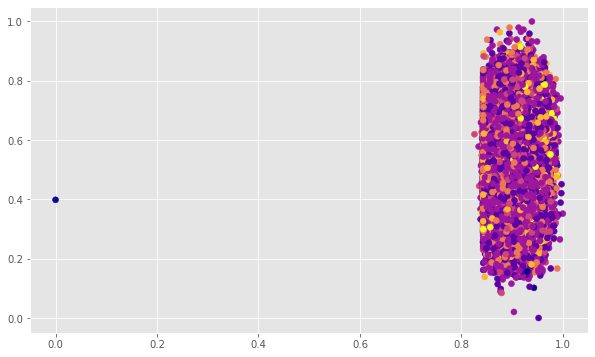

In [89]:
# Plot the clusters
plt.scatter(fs2_dbscan[:, 0], fs2_dbscan[:,1], c = pred_labels, cmap= "plasma")

plt.show() 

# DBSCAN + FS1

In [90]:
fs1 = ['parameter1', 'parameter4', 'parameter10', 'parameter16', 'parameter17',
       'parameter19', 'parameter34', 'parameter39', 'parameter41',
       'parameter42', 'parameter9_Y', 'parameter18_ni','parameter18_pc']
df_db = data_final[fs1].values.astype(np.float)
scaler = MinMaxScaler()
fs1_dbscan = scaler.fit_transform(df_db)

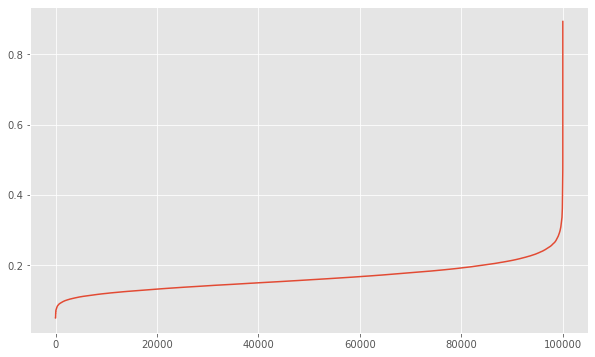

In [92]:
neighb = NearestNeighbors(n_neighbors=13) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(fs1_dbscan) # fitting the data to the object
distances,indices=nbrs.kneighbors(fs1_dbscan) # finding the nearest neighbours
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (10,6) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

In [93]:
import sklearn.metrics as metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.28, min_samples=13, n_jobs=-1).fit(fs1_dbscan)

# Get the cluster labels (aka numbers)
pred_labels = db.labels_

# Count the total number of clusters
n_clusters_ = len(set(pred_labels)) - (1 if -1 in pred_labels else 0)

# Print model results
print(f'Estimated number of clusters: {n_clusters_}')

# Print model results
print(f'Silhouette Coefficient: {metrics.silhouette_score(fs1_dbscan, pred_labels):0.3f}')

# Get sample counts in each cluster 
counts = np.bincount(pred_labels[pred_labels>=0])
print(counts)

Estimated number of clusters: 7
Silhouette Coefficient: 0.301
[26049  8528 42896 14427  1260  4750    14]


In [94]:
counts = np.bincount(pred_labels[pred_labels >= 0])

# Print the result
print(counts)

[26049  8528 42896 14427  1260  4750    14]


In [95]:
smallest_clusters = np.argsort(counts)[:3]


In [96]:
print(f'The smallest clusters are clusters: {smallest_clusters}')


The smallest clusters are clusters: [6 4 5]


In [97]:
print(f'Their counts are: {counts[smallest_clusters]}')


Their counts are: [  14 1260 4750]


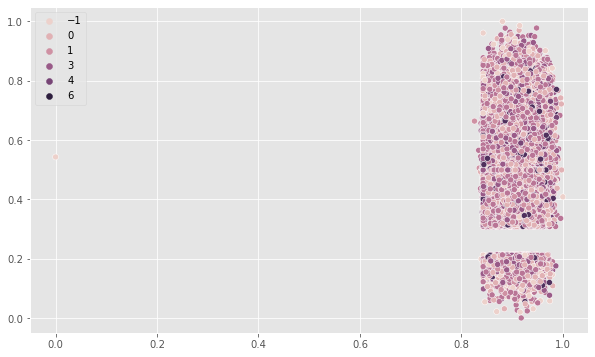

In [98]:
sns.scatterplot(x=fs1_dbscan[:, 0], y=fs1_dbscan[:, 1], hue=pred_labels,cmap= "plasma")
plt.show()

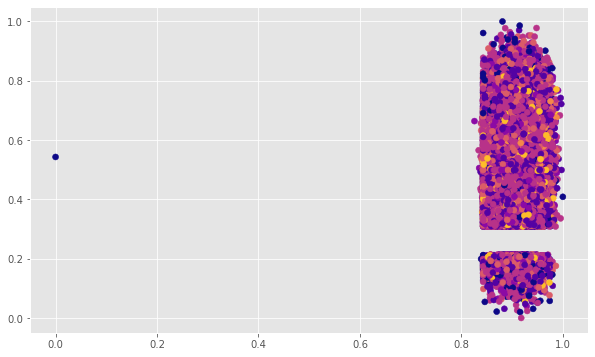

In [99]:
# Plot the clusters
plt.scatter(fs1_dbscan[:, 0], fs1_dbscan[:,1], c = pred_labels, cmap= "plasma") 

plt.show() 

# KNN using over sampled data

Text(0, 0.5, 'Frequency')

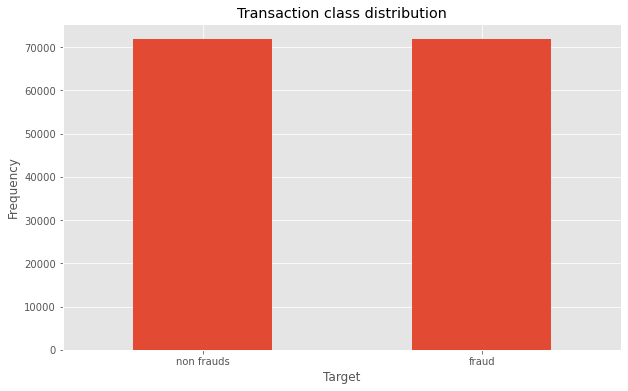

In [100]:
# Let's plot the Transaction class against the Frequency
labels = ['non frauds','fraud']
classes = pd.value_counts(fs1_data['Target'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Target")
plt.ylabel("Frequency")

# KNN + FS1

In [101]:
# prepare the data
features = fs1_data.drop(['Target'], axis = 1)
label = fs1_data[['Target']]

feature_array = features.values
label_array = label.values

In [102]:
# splitting the faeture array and label array keeping 80% for the trainnig sets
M_train,M_test,n_train,n_test = train_test_split(feature_array,label_array,test_size=0.20)


In [104]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(M_train,n_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(M_train, n_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(M_test, n_test.ravel())

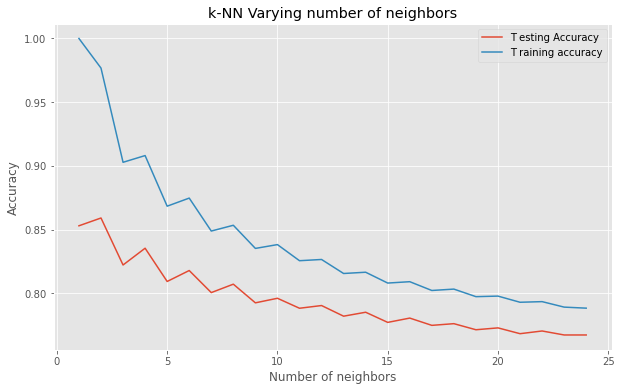

In [105]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='T esting Accuracy')
plt.plot(neighbours, train_accuracy, label='T raining accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [106]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [107]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(M_train,n_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=2)

In [108]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(M_test)

Text(0.5, 1.0, ' Number of Blobs')

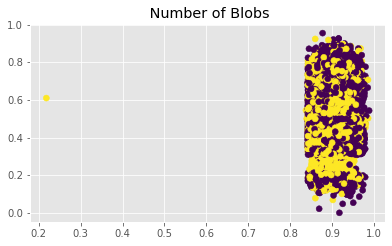

In [109]:
from pylab import rcParams
#plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(M_test[:, 0], M_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [110]:
#scoring knn
knn_accuracy_score  = accuracy_score(n_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(n_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(n_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(n_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(n_test,knn_predicted_test_labels)

In [111]:
#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(n_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.8591157338157025
Precison --> 0.8435356200527705
Recall --> 0.8840038711461358
F1 --> 0.8632957537298319
MCC --> 0.7189713516184041
              precision    recall  f1-score   support

           0       0.88      0.83      0.85     14281
           1       0.84      0.88      0.86     14466

    accuracy                           0.86     28747
   macro avg       0.86      0.86      0.86     28747
weighted avg       0.86      0.86      0.86     28747



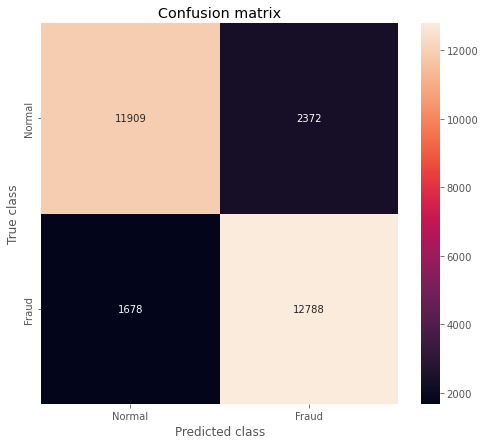

In [112]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(n_test, knn_predicted_test_labels)
plt.figure(figsize=(8, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# KNN + FS2

In [113]:
# prepare the data
features2 = fs2_data.drop(['Target'], axis = 1)
label2 = fs2_data[['Target']]

feature_array = features2.values
label_array = label2.values

In [114]:
# splitting the faeture array and label array keeping 80% for the trainnig sets
M_train,M_test,n_train,n_test = train_test_split(feature_array,label_array,test_size=0.20)

# normalize: Scale input vectors individually to unit norm (vector length).
#M_train = normalize(M_train)
#M_test=normalize(M_test)

In [115]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(M_train,n_train.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(M_train, n_train.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(M_test, n_test.ravel())

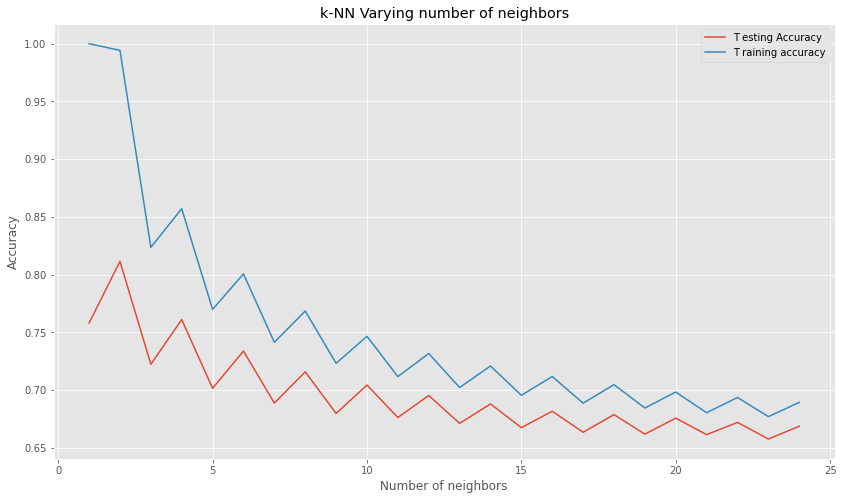

In [116]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='T esting Accuracy')
plt.plot(neighbours, train_accuracy, label='T raining accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [117]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [118]:
#k_nearest_neighbours_classification
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(M_train,n_train.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=2)

In [119]:
# predicting labels for testing set
knn_predicted_test_labels=knn.predict(M_test)

Text(0.5, 1.0, ' Number of Blobs')

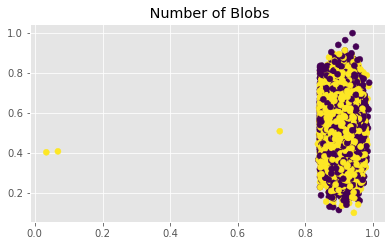

In [120]:
from pylab import rcParams
#plt.figure(figsize=(12, 12))
rcParams['figure.figsize'] = 14, 8
plt.subplot(222)
plt.scatter(M_test[:, 0], M_test[:, 1], c=knn_predicted_test_labels)
plt.title(" Number of Blobs")

In [121]:
#scoring knn
knn_accuracy_score  = accuracy_score(n_test,knn_predicted_test_labels)
knn_precison_score  = precision_score(n_test,knn_predicted_test_labels)
knn_recall_score    = recall_score(n_test,knn_predicted_test_labels)
knn_f1_score        = f1_score(n_test,knn_predicted_test_labels)
knn_MCC             = matthews_corrcoef(n_test,knn_predicted_test_labels)

In [122]:
#printing
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print("MCC -->",knn_MCC)
print(classification_report(n_test,knn_predicted_test_labels))


K-Nearest Neighbours
Scores
Accuracy --> 0.8114933732215536
Precison --> 0.7341878989291555
Recall --> 0.9734228563435445
F1 --> 0.8370470605923922
MCC --> 0.6590787303527685
              precision    recall  f1-score   support

           0       0.96      0.65      0.78     14449
           1       0.73      0.97      0.84     14298

    accuracy                           0.81     28747
   macro avg       0.85      0.81      0.81     28747
weighted avg       0.85      0.81      0.81     28747



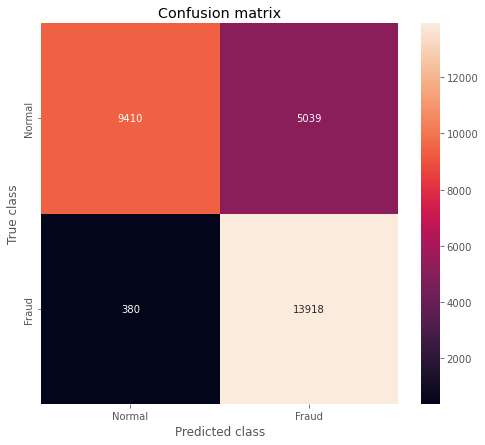

In [123]:
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(n_test, knn_predicted_test_labels)
plt.figure(figsize=(8, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# Conclusion
>KNN with RFECV for classification true positive rate is greater than KNN with sequential feature selection 
and False negative rate is less for KNN with RFECV.

>So we can conclude that KNN with RFECV is better model for given dataset.